In [2]:
%matplotlib inline

In [3]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False

In [4]:
def check_if_connect(genome, config):
    used_nodes = list(genome.nodes.keys())
    # create a dict for mapping 
    l1 = [0] + config.genome_config.input_keys + used_nodes[1:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))
    
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in genome.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])
    # 
    v = 0
    list_connections = []
    for u in range(1, len(config.genome_config.input_keys) + 1):
        list_connections.append(g.isReachable(u, v))
    return list_connections

In [5]:
def ad_fit(x):
    #ad_fit = np.exp(x**2)**10*(x**2)
    ad_fit = np.exp(x)**3*(x**2)
    #ad_fit = (x**2)
    return ad_fit

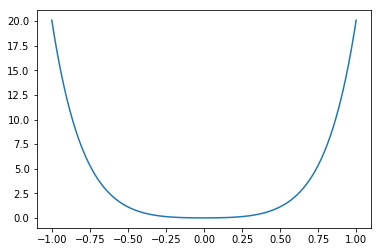

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import multiprocessing
import os
import neat
import visualize

x = np.arange(-1.0, 1.01, 0.01)
y = np.exp(np.abs(x))**3*(x**2)
plt.plot(x,y)
plt.show()

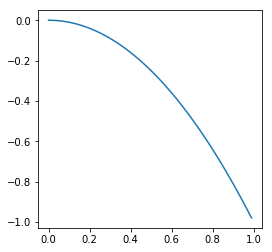

In [7]:
plt.figure(figsize=(4, 4))
x = np.arange(0, 1, 0.01)
y =  - x**2
plt.plot(x,y)
plt.show()

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import multiprocessing
import os
import neat
import visualize

import warnings
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'


def eval_genomes(genomes, config):
    for genome_id, genome in genomes:

        net = neat.nn.FeedForwardNetwork.create(genome, config)
        
        # print(genome_id, check_if_connect(genome, config))
        list_check_if_connect = check_if_connect(genome, config)
        
        # number of ture and false
        number_true = list_check_if_connect.count(True)
        number_false = list_check_if_connect.count(False)
        unconnect_ratio = number_false/(number_true + number_false)
        
        
        # no connections at all
        if (number_true == 0):
            mse = -1
        # there are connections
        else:
            sum_error = 0.0
            for xi, xo in zip(x_inputs, x_outputs):
                output = net.activate(xi)
                error = np.abs(output[0] - xo[0])
                if error > 1:
                    error = 1
                adj_error = ad_fit(error)
                sum_error -= adj_error
                # sum_error -= np.abs(output[0] - xo[0])
            mse = sum_error/samplesize
            mse -= unconnect_ratio**2

        genome.fitness = mse


def run(config_file):
    # Load configuration.
    config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_file,
    )

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # add a stdout reporter to show progress in the terminal
    reporter = neat.StdOutReporter(False)
    p.add_reporter(reporter)
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    checkpointer = neat.Checkpointer(1000)
    p.add_reporter(checkpointer)
    # Run for up to 300 generations.
    winner = p.run(eval_genomes, 5000)

    return [stats,winner]

In [9]:
df=pd.read_csv('new_train_X.csv', sep=' ',header=None)
new_train_X = df.values
df=pd.read_csv('new_train_Y.csv', sep=' ',header=None)
new_train_Y = df.values

X_train_inputs = []
Y_train_outputs = []
# L = len(new_train_X)
L = len(new_train_X)
for i in range(L):
    X_train_inputs.append(tuple(new_train_X[i]))
for i in range(L):
    Y_train_outputs.append(tuple(new_train_Y[i]))

x_inputs = X_train_inputs
x_outputs = Y_train_outputs

In [10]:
samplesize = len(x_outputs)

In [11]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-sunspot")

stats_list = []
winner_list = []
for i in range(1):
    [stats,winner] = run(config_path)
    stats_list.append(stats)

    winner_list.append(winner)


 ****** Running generation 0 ****** 

Population's average fitness: -3.40644 stdev: 2.62520
Best fitness: -0.34961 - size: (1, 8) - species 1 - id 51
Average adjusted fitness: 0.560
Mean genetic distance 1.840, standard deviation 0.552
Population of 100 members in 2 species
Total extinctions: 0
Generation time: 0.266 sec

 ****** Running generation 1 ****** 

Population's average fitness: -3.02419 stdev: 4.71544
Best fitness: -0.20623 - size: (1, 8) - species 1 - id 118
Average adjusted fitness: 0.802
Mean genetic distance 2.079, standard deviation 0.636
Population of 100 members in 3 species
Total extinctions: 0
Generation time: 0.275 sec (0.270 average)

 ****** Running generation 2 ****** 

Population's average fitness: -3.38556 stdev: 4.32647
Best fitness: -0.11211 - size: (1, 8) - species 1 - id 240
Average adjusted fitness: 0.834
Mean genetic distance 2.191, standard deviation 0.664
Population of 100 members in 3 species
Total extinctions: 0
Generation time: 0.283 sec (0.275 ave

Population's average fitness: -3.39674 stdev: 6.36708
Best fitness: -0.05629 - size: (2, 9) - species 1 - id 1622
Average adjusted fitness: 0.826
Mean genetic distance 2.294, standard deviation 0.602
Population of 103 members in 8 species
Total extinctions: 0
Generation time: 0.363 sec (0.370 average)

 ****** Running generation 25 ****** 

Population's average fitness: -2.26080 stdev: 4.81336
Best fitness: -0.05629 - size: (2, 9) - species 1 - id 1622
Average adjusted fitness: 0.896
Mean genetic distance 2.390, standard deviation 0.625
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.395 sec (0.370 average)

 ****** Running generation 26 ****** 

Population's average fitness: -3.96210 stdev: 6.63060
Best fitness: -0.05629 - size: (2, 9) - species 1 - id 1622
Average adjusted fitness: 0.786
Mean genetic distance 2.443, standard deviation 0.637
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.391 sec (0.371 average)

 ****** Run

Population's average fitness: -3.78050 stdev: 6.04186
Best fitness: -0.03734 - size: (3, 10) - species 1 - id 4350
Average adjusted fitness: 0.813
Mean genetic distance 2.469, standard deviation 0.645
Population of 102 members in 11 species
Total extinctions: 0
Generation time: 0.469 sec (0.432 average)

 ****** Running generation 49 ****** 

Population's average fitness: -4.14044 stdev: 6.80395
Best fitness: -0.03734 - size: (3, 10) - species 4 - id 4350
Average adjusted fitness: 0.800
Mean genetic distance 2.410, standard deviation 0.652
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.463 sec (0.435 average)

 ****** Running generation 50 ****** 

Population's average fitness: -3.00544 stdev: 5.73720
Best fitness: -0.03734 - size: (3, 10) - species 4 - id 4350
Average adjusted fitness: 0.853
Mean genetic distance 2.459, standard deviation 0.629
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.405 sec (0.431 average)

 ****

Population's average fitness: -3.18613 stdev: 5.78735
Best fitness: -0.03734 - size: (3, 10) - species 3 - id 4350
Average adjusted fitness: 0.845
Mean genetic distance 2.760, standard deviation 0.675
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.428 sec (0.433 average)

 ****** Running generation 73 ****** 

Population's average fitness: -3.05684 stdev: 5.73687
Best fitness: -0.03734 - size: (3, 10) - species 3 - id 4350
Average adjusted fitness: 0.851
Mean genetic distance 2.826, standard deviation 0.689
Population of 104 members in 11 species
Total extinctions: 0
Generation time: 0.434 sec (0.433 average)

 ****** Running generation 74 ****** 

Population's average fitness: -3.79289 stdev: 6.70153
Best fitness: -0.03734 - size: (3, 10) - species 3 - id 4350
Average adjusted fitness: 0.814
Mean genetic distance 2.857, standard deviation 0.715
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.462 sec (0.436 average)

 *****

Population's average fitness: -3.12519 stdev: 5.90371
Best fitness: -0.03734 - size: (3, 10) - species 3 - id 4350
Average adjusted fitness: 0.848
Mean genetic distance 2.737, standard deviation 0.671
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.457 sec (0.461 average)

 ****** Running generation 97 ****** 

Population's average fitness: -3.81972 stdev: 6.61840
Best fitness: -0.03734 - size: (3, 10) - species 3 - id 4350
Average adjusted fitness: 0.814
Mean genetic distance 2.787, standard deviation 0.691
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.460 sec (0.461 average)

 ****** Running generation 98 ****** 

Population's average fitness: -3.63493 stdev: 6.10606
Best fitness: -0.03734 - size: (3, 10) - species 3 - id 4350
Average adjusted fitness: 0.824
Mean genetic distance 2.786, standard deviation 0.671
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.449 sec (0.461 average)

 *****

Population's average fitness: -2.96775 stdev: 5.60722
Best fitness: -0.03734 - size: (3, 10) - species 3 - id 4350
Average adjusted fitness: 0.856
Mean genetic distance 2.730, standard deviation 0.690
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.458 sec (0.450 average)

 ****** Running generation 121 ****** 

Population's average fitness: -3.66509 stdev: 5.72179
Best fitness: -0.03734 - size: (3, 10) - species 3 - id 4350
Average adjusted fitness: 0.819
Mean genetic distance 2.711, standard deviation 0.714
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.454 sec (0.451 average)

 ****** Running generation 122 ****** 

Population's average fitness: -3.30663 stdev: 5.86528
Best fitness: -0.03734 - size: (3, 10) - species 3 - id 4350
Average adjusted fitness: 0.834
Mean genetic distance 2.689, standard deviation 0.727
Population of 97 members in 8 species
Total extinctions: 0
Generation time: 0.459 sec (0.453 average)

 ****** 

Population's average fitness: -3.61410 stdev: 6.13975
Best fitness: -0.03734 - size: (3, 10) - species 3 - id 4350
Average adjusted fitness: 0.823
Mean genetic distance 2.786, standard deviation 0.708
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.499 sec (0.521 average)

 ****** Running generation 145 ****** 

Population's average fitness: -3.41216 stdev: 6.05870
Best fitness: -0.03734 - size: (3, 10) - species 3 - id 4350
Average adjusted fitness: 0.833
Mean genetic distance 2.800, standard deviation 0.753
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 0.492 sec (0.517 average)

 ****** Running generation 146 ****** 

Population's average fitness: -2.78534 stdev: 5.41489
Best fitness: -0.03734 - size: (3, 10) - species 3 - id 4350
Average adjusted fitness: 0.860
Mean genetic distance 2.818, standard deviation 0.749
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.524 sec (0.519 average)

 *****

Population's average fitness: -3.27469 stdev: 6.04000
Best fitness: -0.03734 - size: (3, 10) - species 3 - id 4350
Average adjusted fitness: 0.837
Mean genetic distance 2.746, standard deviation 0.632
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.454 sec (0.483 average)

 ****** Running generation 169 ****** 

Population's average fitness: -3.05115 stdev: 5.71368
Best fitness: -0.03734 - size: (3, 10) - species 3 - id 4350
Average adjusted fitness: 0.848
Mean genetic distance 2.827, standard deviation 0.639
Population of 97 members in 10 species
Total extinctions: 0
Generation time: 0.464 sec (0.479 average)

 ****** Running generation 170 ****** 

Population's average fitness: -3.14077 stdev: 6.00389
Best fitness: -0.03734 - size: (3, 10) - species 3 - id 4350
Average adjusted fitness: 0.819
Mean genetic distance 2.831, standard deviation 0.656
Population of 96 members in 10 species
Total extinctions: 0
Generation time: 0.453 sec (0.474 average)

 *****

Population's average fitness: -2.64536 stdev: 5.01663
Best fitness: -0.03734 - size: (3, 10) - species 3 - id 4350
Average adjusted fitness: 0.870
Mean genetic distance 2.728, standard deviation 0.674
Population of 100 members in 7 species
Total extinctions: 0
Generation time: 0.462 sec (0.464 average)

 ****** Running generation 193 ****** 

Population's average fitness: -3.65420 stdev: 6.42159
Best fitness: -0.03734 - size: (3, 10) - species 3 - id 4350
Average adjusted fitness: 0.821
Mean genetic distance 2.744, standard deviation 0.647
Population of 99 members in 7 species
Total extinctions: 0
Generation time: 0.472 sec (0.462 average)

 ****** Running generation 194 ****** 

Population's average fitness: -4.94409 stdev: 7.27789
Best fitness: -0.03734 - size: (3, 10) - species 3 - id 4350
Average adjusted fitness: 0.756
Mean genetic distance 2.771, standard deviation 0.629
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.481 sec (0.462 average)

 *****

Population's average fitness: -3.44347 stdev: 6.08752
Best fitness: -0.03734 - size: (3, 10) - species 3 - id 4350
Average adjusted fitness: 0.833
Mean genetic distance 2.740, standard deviation 0.639
Population of 103 members in 10 species
Total extinctions: 0
Generation time: 0.499 sec (0.491 average)

 ****** Running generation 217 ****** 

Population's average fitness: -4.04179 stdev: 6.71742
Best fitness: -0.03734 - size: (3, 10) - species 3 - id 4350
Average adjusted fitness: 0.812
Mean genetic distance 2.701, standard deviation 0.670
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.487 sec (0.490 average)

 ****** Running generation 218 ****** 

Population's average fitness: -3.23901 stdev: 5.85736
Best fitness: -0.03734 - size: (3, 10) - species 3 - id 4350
Average adjusted fitness: 0.840
Mean genetic distance 2.715, standard deviation 0.637
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.491 sec (0.490 average)

 ***

Population's average fitness: -2.92910 stdev: 5.86027
Best fitness: -0.03734 - size: (3, 10) - species 3 - id 4350
Average adjusted fitness: 0.860
Mean genetic distance 2.813, standard deviation 0.670
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.528 sec (0.523 average)

 ****** Running generation 241 ****** 

Population's average fitness: -3.52718 stdev: 6.16737
Best fitness: -0.03734 - size: (3, 10) - species 3 - id 4350
Average adjusted fitness: 0.824
Mean genetic distance 2.808, standard deviation 0.716
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.563 sec (0.526 average)

 ****** Running generation 242 ****** 

Population's average fitness: -2.91790 stdev: 5.70859
Best fitness: -0.03734 - size: (3, 10) - species 3 - id 4350
Average adjusted fitness: 0.861
Mean genetic distance 2.773, standard deviation 0.710
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.531 sec (0.526 average)

 **

Population's average fitness: -3.57531 stdev: 5.95300
Best fitness: -0.03652 - size: (3, 10) - species 3 - id 22408
Average adjusted fitness: 0.814
Mean genetic distance 2.861, standard deviation 0.713
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.553 sec (0.557 average)

 ****** Running generation 265 ****** 

Population's average fitness: -3.82555 stdev: 6.30814
Best fitness: -0.03652 - size: (3, 10) - species 3 - id 22408
Average adjusted fitness: 0.824
Mean genetic distance 2.849, standard deviation 0.769
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.540 sec (0.557 average)

 ****** Running generation 266 ****** 

Population's average fitness: -3.26333 stdev: 5.89955
Best fitness: -0.03652 - size: (3, 10) - species 3 - id 22408
Average adjusted fitness: 0.840
Mean genetic distance 2.845, standard deviation 0.764
Population of 97 members in 8 species
Total extinctions: 0
Generation time: 0.542 sec (0.557 average)

 ****

Population's average fitness: -3.03700 stdev: 5.62046
Best fitness: -0.03652 - size: (3, 10) - species 3 - id 22408
Average adjusted fitness: 0.855
Mean genetic distance 2.851, standard deviation 0.646
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.556 sec (0.544 average)

 ****** Running generation 289 ****** 

Population's average fitness: -2.90240 stdev: 5.49817
Best fitness: -0.03652 - size: (3, 10) - species 3 - id 22408
Average adjusted fitness: 0.859
Mean genetic distance 2.823, standard deviation 0.623
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.575 sec (0.549 average)

 ****** Running generation 290 ****** 

Population's average fitness: -3.04498 stdev: 5.82768
Best fitness: -0.03652 - size: (3, 10) - species 3 - id 22408
Average adjusted fitness: 0.857
Mean genetic distance 2.798, standard deviation 0.625
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.557 sec (0.548 average)

 ****

Population's average fitness: -3.85099 stdev: 6.44901
Best fitness: -0.03652 - size: (3, 10) - species 3 - id 22408
Average adjusted fitness: 0.810
Mean genetic distance 2.653, standard deviation 0.667
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.575 sec (0.558 average)

 ****** Running generation 313 ****** 

Population's average fitness: -3.26517 stdev: 5.91083
Best fitness: -0.03652 - size: (3, 10) - species 3 - id 22408
Average adjusted fitness: 0.842
Mean genetic distance 2.687, standard deviation 0.673
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.590 sec (0.561 average)

 ****** Running generation 314 ****** 

Population's average fitness: -2.94656 stdev: 5.29088
Best fitness: -0.03652 - size: (3, 10) - species 3 - id 22408
Average adjusted fitness: 0.856
Mean genetic distance 2.699, standard deviation 0.684
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.580 sec (0.567 average)

 ***

Population's average fitness: -3.44637 stdev: 5.43526
Best fitness: -0.03652 - size: (3, 10) - species 3 - id 22408
Average adjusted fitness: 0.834
Mean genetic distance 2.692, standard deviation 0.700
Population of 103 members in 8 species
Total extinctions: 0
Generation time: 0.563 sec (0.564 average)

 ****** Running generation 337 ****** 

Population's average fitness: -3.39492 stdev: 6.00102
Best fitness: -0.03652 - size: (3, 10) - species 3 - id 22408
Average adjusted fitness: 0.833
Mean genetic distance 2.757, standard deviation 0.691
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.601 sec (0.571 average)

 ****** Running generation 338 ****** 

Population's average fitness: -3.80868 stdev: 6.20061
Best fitness: -0.03652 - size: (3, 10) - species 3 - id 22408
Average adjusted fitness: 0.811
Mean genetic distance 2.762, standard deviation 0.687
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.605 sec (0.574 average)

 *

Population's average fitness: -3.52192 stdev: 6.19238
Best fitness: -0.03652 - size: (3, 10) - species 3 - id 22408
Average adjusted fitness: 0.841
Mean genetic distance 2.730, standard deviation 0.669
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.608 sec (0.596 average)

 ****** Running generation 361 ****** 

Population's average fitness: -2.87016 stdev: 5.54759
Best fitness: -0.03652 - size: (3, 10) - species 3 - id 22408
Average adjusted fitness: 0.861
Mean genetic distance 2.740, standard deviation 0.649
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.609 sec (0.600 average)

 ****** Running generation 362 ****** 

Population's average fitness: -3.04231 stdev: 5.60143
Best fitness: -0.03652 - size: (3, 10) - species 3 - id 22408
Average adjusted fitness: 0.851
Mean genetic distance 2.760, standard deviation 0.623
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.598 sec (0.601 average)

 **

Population's average fitness: -2.77202 stdev: 5.72891
Best fitness: -0.03652 - size: (3, 10) - species 3 - id 22408
Average adjusted fitness: 0.863
Mean genetic distance 2.782, standard deviation 0.666
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.600 sec (0.589 average)

 ****** Running generation 385 ****** 

Population's average fitness: -3.05416 stdev: 5.86987
Best fitness: -0.03652 - size: (3, 10) - species 3 - id 22408
Average adjusted fitness: 0.851
Mean genetic distance 2.759, standard deviation 0.689
Population of 104 members in 10 species
Total extinctions: 0
Generation time: 0.637 sec (0.594 average)

 ****** Running generation 386 ****** 

Population's average fitness: -4.01112 stdev: 6.71959
Best fitness: -0.03652 - size: (3, 10) - species 3 - id 22408
Average adjusted fitness: 0.804
Mean genetic distance 2.800, standard deviation 0.671
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.621 sec (0.598 average)



Population's average fitness: -2.84786 stdev: 5.56517
Best fitness: -0.03652 - size: (3, 10) - species 3 - id 22408
Average adjusted fitness: 0.854
Mean genetic distance 2.912, standard deviation 0.719
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.600 sec (0.596 average)

 ****** Running generation 409 ****** 

Population's average fitness: -4.33365 stdev: 6.87268
Best fitness: -0.03652 - size: (3, 10) - species 3 - id 22408
Average adjusted fitness: 0.786
Mean genetic distance 2.877, standard deviation 0.727
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.606 sec (0.600 average)

 ****** Running generation 410 ****** 

Population's average fitness: -2.80051 stdev: 5.53047
Best fitness: -0.03652 - size: (3, 10) - species 3 - id 22408
Average adjusted fitness: 0.861
Mean genetic distance 2.882, standard deviation 0.734
Population of 104 members in 10 species
Total extinctions: 0
Generation time: 0.595 sec (0.602 average)



Population's average fitness: -4.91990 stdev: 7.49985
Best fitness: -0.03322 - size: (7, 16) - species 16 - id 39194
Average adjusted fitness: 0.758
Mean genetic distance 2.825, standard deviation 0.687
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 0.624 sec (0.620 average)

 ****** Running generation 433 ****** 

Population's average fitness: -3.47316 stdev: 6.09261
Best fitness: -0.03322 - size: (7, 16) - species 16 - id 39194
Average adjusted fitness: 0.828
Mean genetic distance 2.836, standard deviation 0.727
Population of 102 members in 7 species
Total extinctions: 0
Generation time: 0.636 sec (0.614 average)

 ****** Running generation 434 ****** 

Population's average fitness: -2.81625 stdev: 5.49702
Best fitness: -0.03322 - size: (7, 16) - species 16 - id 39194
Average adjusted fitness: 0.852
Mean genetic distance 2.778, standard deviation 0.779
Population of 101 members in 7 species
Total extinctions: 0
Generation time: 0.654 sec (0.620 average)


Population's average fitness: -2.72594 stdev: 5.94288
Best fitness: -0.03322 - size: (7, 16) - species 16 - id 39194
Average adjusted fitness: 0.866
Mean genetic distance 2.766, standard deviation 0.655
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.607 sec (0.769 average)

 ****** Running generation 457 ****** 

Population's average fitness: -3.75975 stdev: 6.18164
Best fitness: -0.03322 - size: (7, 16) - species 16 - id 39194
Average adjusted fitness: 0.816
Mean genetic distance 2.760, standard deviation 0.675
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.601 sec (0.767 average)

 ****** Running generation 458 ****** 

Population's average fitness: -2.74407 stdev: 5.16238
Best fitness: -0.03322 - size: (7, 16) - species 16 - id 39194
Average adjusted fitness: 0.860
Mean genetic distance 2.788, standard deviation 0.701
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.612 sec (0.727 average)


Population's average fitness: -3.34217 stdev: 5.72399
Best fitness: -0.03322 - size: (7, 16) - species 16 - id 39194
Average adjusted fitness: 0.837
Mean genetic distance 2.901, standard deviation 0.732
Population of 97 members in 8 species
Total extinctions: 0
Generation time: 0.716 sec (0.667 average)

 ****** Running generation 481 ****** 

Population's average fitness: -3.90383 stdev: 6.49818
Best fitness: -0.03322 - size: (7, 16) - species 16 - id 39194
Average adjusted fitness: 0.807
Mean genetic distance 2.860, standard deviation 0.782
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.580 sec (0.666 average)

 ****** Running generation 482 ****** 

Population's average fitness: -3.54049 stdev: 6.33089
Best fitness: -0.03322 - size: (7, 16) - species 16 - id 39194
Average adjusted fitness: 0.828
Mean genetic distance 2.857, standard deviation 0.757
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.572 sec (0.663 average)



Population's average fitness: -2.62842 stdev: 5.01293
Best fitness: -0.03322 - size: (7, 16) - species 16 - id 39194
Average adjusted fitness: 0.868
Mean genetic distance 2.940, standard deviation 0.751
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.543 sec (0.596 average)

 ****** Running generation 505 ****** 

Population's average fitness: -3.43357 stdev: 6.20072
Best fitness: -0.03322 - size: (7, 16) - species 16 - id 39194
Average adjusted fitness: 0.835
Mean genetic distance 2.970, standard deviation 0.733
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.582 sec (0.595 average)

 ****** Running generation 506 ****** 

Population's average fitness: -3.40598 stdev: 6.31296
Best fitness: -0.03322 - size: (7, 16) - species 16 - id 39194
Average adjusted fitness: 0.833
Mean genetic distance 3.002, standard deviation 0.741
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.563 sec (0.599 average)

 

Population's average fitness: -3.03408 stdev: 5.75024
Best fitness: -0.03322 - size: (7, 16) - species 16 - id 39194
Average adjusted fitness: 0.845
Mean genetic distance 2.981, standard deviation 0.721
Population of 97 members in 12 species
Total extinctions: 0
Generation time: 0.611 sec (0.607 average)

 ****** Running generation 529 ****** 

Population's average fitness: -2.18917 stdev: 4.94892
Best fitness: -0.03322 - size: (7, 16) - species 16 - id 39194
Average adjusted fitness: 0.886
Mean genetic distance 2.990, standard deviation 0.732
Population of 96 members in 12 species
Total extinctions: 0
Generation time: 0.570 sec (0.604 average)

 ****** Running generation 530 ****** 

Population's average fitness: -2.23611 stdev: 4.40571
Best fitness: -0.03322 - size: (7, 16) - species 16 - id 39194
Average adjusted fitness: 0.887
Mean genetic distance 2.996, standard deviation 0.730
Population of 100 members in 12 species
Total extinctions: 0
Generation time: 0.570 sec (0.602 average)

Population's average fitness: -3.11470 stdev: 5.99888
Best fitness: -0.03322 - size: (7, 16) - species 16 - id 39194
Average adjusted fitness: 0.841
Mean genetic distance 2.998, standard deviation 0.740
Population of 97 members in 12 species
Total extinctions: 0
Generation time: 1.123 sec (0.798 average)

 ****** Running generation 553 ****** 

Population's average fitness: -1.95061 stdev: 3.78611
Best fitness: -0.03322 - size: (7, 16) - species 16 - id 39194
Average adjusted fitness: 0.901
Mean genetic distance 3.038, standard deviation 0.725
Population of 99 members in 12 species
Total extinctions: 0
Generation time: 1.038 sec (0.837 average)

 ****** Running generation 554 ****** 

Population's average fitness: -2.89367 stdev: 5.52939
Best fitness: -0.03322 - size: (7, 16) - species 16 - id 39194
Average adjusted fitness: 0.859
Mean genetic distance 2.997, standard deviation 0.747
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.617 sec (0.829 average)


Population's average fitness: -3.17005 stdev: 6.09788
Best fitness: -0.03322 - size: (7, 16) - species 16 - id 39194
Average adjusted fitness: 0.840
Mean genetic distance 2.734, standard deviation 0.735
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.564 sec (0.683 average)

 ****** Running generation 577 ****** 

Population's average fitness: -2.18699 stdev: 4.60144
Best fitness: -0.03322 - size: (7, 16) - species 16 - id 39194
Average adjusted fitness: 0.901
Mean genetic distance 2.718, standard deviation 0.744
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.865 sec (0.714 average)

 ****** Running generation 578 ****** 

Population's average fitness: -3.08449 stdev: 5.65110
Best fitness: -0.03322 - size: (7, 16) - species 16 - id 39194
Average adjusted fitness: 0.851
Mean genetic distance 2.657, standard deviation 0.708
Population of 97 members in 8 species
Total extinctions: 0
Generation time: 0.861 sec (0.742 average)

 

Population's average fitness: -3.55217 stdev: 6.11225
Best fitness: -0.03322 - size: (7, 16) - species 16 - id 39194
Average adjusted fitness: 0.827
Mean genetic distance 2.281, standard deviation 0.698
Population of 100 members in 7 species
Total extinctions: 0
Generation time: 0.562 sec (0.604 average)

 ****** Running generation 601 ****** 

Population's average fitness: -2.47499 stdev: 4.88953
Best fitness: -0.03322 - size: (7, 16) - species 16 - id 39194
Average adjusted fitness: 0.880
Mean genetic distance 2.260, standard deviation 0.698
Population of 100 members in 7 species
Total extinctions: 0
Generation time: 0.430 sec (0.558 average)

 ****** Running generation 602 ****** 

Population's average fitness: -2.48460 stdev: 4.89752
Best fitness: -0.03322 - size: (7, 16) - species 16 - id 39194
Average adjusted fitness: 0.878
Mean genetic distance 2.303, standard deviation 0.664
Population of 99 members in 7 species
Total extinctions: 0
Generation time: 0.419 sec (0.528 average)



Population's average fitness: -3.30958 stdev: 5.33583
Best fitness: -0.03322 - size: (7, 16) - species 16 - id 39194
Average adjusted fitness: 0.785
Mean genetic distance 2.838, standard deviation 0.666
Population of 99 members in 7 species
Total extinctions: 0
Generation time: 0.653 sec (0.678 average)

 ****** Running generation 625 ****** 

Population's average fitness: -4.13872 stdev: 6.33069
Best fitness: -0.03322 - size: (7, 16) - species 16 - id 39194
Average adjusted fitness: 0.777
Mean genetic distance 2.801, standard deviation 0.639
Population of 98 members in 7 species
Total extinctions: 0
Generation time: 0.656 sec (0.677 average)

 ****** Running generation 626 ****** 

Population's average fitness: -2.84632 stdev: 5.22688
Best fitness: -0.03322 - size: (7, 16) - species 16 - id 39194
Average adjusted fitness: 0.846
Mean genetic distance 2.812, standard deviation 0.658
Population of 99 members in 7 species
Total extinctions: 0
Generation time: 0.541 sec (0.646 average)

 *

Population's average fitness: -3.66660 stdev: 6.23058
Best fitness: -0.03322 - size: (7, 16) - species 16 - id 39194
Average adjusted fitness: 0.831
Mean genetic distance 2.839, standard deviation 0.641
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 1.047 sec (0.697 average)

 ****** Running generation 649 ****** 

Population's average fitness: -3.11608 stdev: 5.72480
Best fitness: -0.03322 - size: (7, 16) - species 16 - id 39194
Average adjusted fitness: 0.840
Mean genetic distance 2.830, standard deviation 0.641
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.817 sec (0.722 average)

 ****** Running generation 650 ****** 

Population's average fitness: -3.65197 stdev: 6.24598
Best fitness: -0.03322 - size: (7, 16) - species 16 - id 39194
Average adjusted fitness: 0.819
Mean genetic distance 2.820, standard deviation 0.619
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.597 sec (0.727 average)


Population's average fitness: -4.06138 stdev: 6.75905
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.780
Mean genetic distance 2.930, standard deviation 0.627
Population of 103 members in 12 species
Total extinctions: 0
Generation time: 0.646 sec (0.789 average)

 ****** Running generation 673 ****** 

Population's average fitness: -3.44195 stdev: 6.48141
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.824
Mean genetic distance 2.962, standard deviation 0.632
Population of 98 members in 12 species
Total extinctions: 0
Generation time: 0.656 sec (0.787 average)

 ****** Running generation 674 ****** 

Population's average fitness: -4.66602 stdev: 7.39728
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.770
Mean genetic distance 2.960, standard deviation 0.617
Population of 97 members in 12 species
Total extinctions: 0
Generation time: 0.935 sec (0.792 average)

 

Population's average fitness: -3.56491 stdev: 6.15456
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.822
Mean genetic distance 2.904, standard deviation 0.655
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.662 sec (0.692 average)

 ****** Running generation 697 ****** 

Population's average fitness: -3.24242 stdev: 6.43431
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.842
Mean genetic distance 2.906, standard deviation 0.674
Population of 96 members in 11 species
Total extinctions: 0
Generation time: 0.683 sec (0.691 average)

 ****** Running generation 698 ****** 

Population's average fitness: -3.75115 stdev: 6.57993
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.818
Mean genetic distance 2.908, standard deviation 0.677
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.630 sec (0.663 average)

 

Population's average fitness: -3.23878 stdev: 5.87919
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.842
Mean genetic distance 2.882, standard deviation 0.676
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 1.125 sec (0.876 average)

 ****** Running generation 721 ****** 

Population's average fitness: -3.19383 stdev: 6.16622
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.837
Mean genetic distance 2.879, standard deviation 0.672
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.643 sec (0.872 average)

 ****** Running generation 722 ****** 

Population's average fitness: -3.95672 stdev: 6.46332
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.806
Mean genetic distance 2.883, standard deviation 0.683
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.676 sec (0.869 average)

 

Population's average fitness: -3.88140 stdev: 6.59091
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.803
Mean genetic distance 2.946, standard deviation 0.702
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 1.022 sec (0.850 average)

 ****** Running generation 745 ****** 

Population's average fitness: -3.42614 stdev: 5.95340
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.824
Mean genetic distance 2.954, standard deviation 0.680
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.707 sec (0.841 average)

 ****** Running generation 746 ****** 

Population's average fitness: -3.70311 stdev: 6.20575
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.812
Mean genetic distance 2.971, standard deviation 0.682
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.609 sec (0.828 average)



Population's average fitness: -2.46323 stdev: 4.88786
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.877
Mean genetic distance 3.012, standard deviation 0.689
Population of 104 members in 11 species
Total extinctions: 0
Generation time: 0.650 sec (0.710 average)

 ****** Running generation 769 ****** 

Population's average fitness: -3.21598 stdev: 5.42808
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.843
Mean genetic distance 2.980, standard deviation 0.689
Population of 102 members in 11 species
Total extinctions: 0
Generation time: 0.636 sec (0.708 average)

 ****** Running generation 770 ****** 

Population's average fitness: -4.23132 stdev: 6.59692
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.790
Mean genetic distance 2.980, standard deviation 0.698
Population of 103 members in 11 species
Total extinctions: 0
Generation time: 0.643 sec (0.706 average)


Population's average fitness: -4.61270 stdev: 7.35889
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.770
Mean genetic distance 2.970, standard deviation 0.712
Population of 103 members in 9 species
Total extinctions: 0
Generation time: 0.879 sec (0.826 average)

 ****** Running generation 793 ****** 

Population's average fitness: -2.78349 stdev: 5.43151
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.861
Mean genetic distance 2.983, standard deviation 0.725
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.913 sec (0.828 average)

 ****** Running generation 794 ****** 

Population's average fitness: -3.43260 stdev: 6.10932
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.829
Mean genetic distance 2.969, standard deviation 0.759
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 1.103 sec (0.870 average)

 *

Population's average fitness: -3.45286 stdev: 6.40312
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.829
Mean genetic distance 2.958, standard deviation 0.736
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 1.074 sec (0.949 average)

 ****** Running generation 817 ****** 

Population's average fitness: -3.82095 stdev: 6.65874
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.810
Mean genetic distance 2.941, standard deviation 0.735
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.943 sec (0.945 average)

 ****** Running generation 818 ****** 

Population's average fitness: -2.31675 stdev: 4.89599
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.890
Mean genetic distance 2.944, standard deviation 0.734
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.649 sec (0.900 average)

 ***

Population's average fitness: -3.57621 stdev: 6.04403
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.818
Mean genetic distance 2.989, standard deviation 0.701
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.729 sec (0.685 average)

 ****** Running generation 841 ****** 

Population's average fitness: -3.14142 stdev: 5.88944
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.838
Mean genetic distance 2.995, standard deviation 0.685
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.664 sec (0.686 average)

 ****** Running generation 842 ****** 

Population's average fitness: -4.98661 stdev: 7.28378
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.747
Mean genetic distance 3.013, standard deviation 0.718
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.693 sec (0.687 average)



Population's average fitness: -2.58204 stdev: 5.32042
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.865
Mean genetic distance 2.955, standard deviation 0.686
Population of 103 members in 11 species
Total extinctions: 0
Generation time: 0.740 sec (0.728 average)

 ****** Running generation 865 ****** 

Population's average fitness: -2.68098 stdev: 4.83289
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.869
Mean genetic distance 2.944, standard deviation 0.704
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.711 sec (0.729 average)

 ****** Running generation 866 ****** 

Population's average fitness: -3.21247 stdev: 5.92910
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.840
Mean genetic distance 2.947, standard deviation 0.706
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.694 sec (0.726 average)

 

Population's average fitness: -2.62303 stdev: 5.23048
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.864
Mean genetic distance 2.802, standard deviation 0.681
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.640 sec (0.684 average)

 ****** Running generation 889 ****** 

Population's average fitness: -3.54564 stdev: 6.57932
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.830
Mean genetic distance 2.828, standard deviation 0.666
Population of 103 members in 11 species
Total extinctions: 0
Generation time: 0.669 sec (0.672 average)

 ****** Running generation 890 ****** 

Population's average fitness: -4.26422 stdev: 7.13131
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.778
Mean genetic distance 2.849, standard deviation 0.688
Population of 96 members in 10 species
Total extinctions: 0
Generation time: 1.185 sec (0.719 average)



Population's average fitness: -3.80985 stdev: 6.35561
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.810
Mean genetic distance 2.888, standard deviation 0.731
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.666 sec (0.670 average)

 ****** Running generation 913 ****** 

Population's average fitness: -4.90358 stdev: 7.34012
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.747
Mean genetic distance 2.913, standard deviation 0.721
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.852 sec (0.688 average)

 ****** Running generation 914 ****** 

Population's average fitness: -3.04107 stdev: 5.83684
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.850
Mean genetic distance 2.943, standard deviation 0.699
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 1.144 sec (0.734 average)

 **

Population's average fitness: -3.44300 stdev: 5.67484
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.828
Mean genetic distance 2.863, standard deviation 0.689
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.602 sec (0.833 average)

 ****** Running generation 937 ****** 

Population's average fitness: -3.14601 stdev: 6.20597
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.850
Mean genetic distance 2.874, standard deviation 0.675
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.639 sec (0.804 average)

 ****** Running generation 938 ****** 

Population's average fitness: -2.88583 stdev: 5.76744
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.853
Mean genetic distance 2.837, standard deviation 0.658
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.620 sec (0.775 average)



Population's average fitness: -2.51652 stdev: 4.82705
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.877
Mean genetic distance 2.904, standard deviation 0.695
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.685 sec (0.692 average)

 ****** Running generation 961 ****** 

Population's average fitness: -3.47282 stdev: 6.03665
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.831
Mean genetic distance 2.883, standard deviation 0.682
Population of 103 members in 9 species
Total extinctions: 0
Generation time: 0.701 sec (0.691 average)

 ****** Running generation 962 ****** 

Population's average fitness: -4.15569 stdev: 6.90424
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.796
Mean genetic distance 2.871, standard deviation 0.678
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.848 sec (0.707 average)

 *

Population's average fitness: -3.51639 stdev: 6.11885
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.828
Mean genetic distance 2.957, standard deviation 0.652
Population of 100 members in 12 species
Total extinctions: 0
Generation time: 0.655 sec (0.865 average)

 ****** Running generation 985 ****** 

Population's average fitness: -2.65663 stdev: 5.56260
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.866
Mean genetic distance 2.956, standard deviation 0.676
Population of 102 members in 12 species
Total extinctions: 0
Generation time: 0.653 sec (0.860 average)

 ****** Running generation 986 ****** 

Population's average fitness: -3.47295 stdev: 6.18007
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.825
Mean genetic distance 2.904, standard deviation 0.686
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.666 sec (0.843 average)



Population's average fitness: -4.17462 stdev: 6.79297
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.732
Mean genetic distance 2.977, standard deviation 0.649
Population of 101 members in 12 species
Total extinctions: 0
Generation time: 0.935 sec (0.682 average)

 ****** Running generation 1009 ****** 

Population's average fitness: -4.30132 stdev: 6.69441
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.757
Mean genetic distance 2.988, standard deviation 0.648
Population of 99 members in 13 species
Total extinctions: 0
Generation time: 0.662 sec (0.673 average)

 ****** Running generation 1010 ****** 

Population's average fitness: -2.16984 stdev: 4.58175
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.857
Mean genetic distance 3.012, standard deviation 0.668
Population of 99 members in 13 species
Total extinctions: 0
Generation time: 1.026 sec (0.708 average)


Population's average fitness: -3.17932 stdev: 6.24856
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.843
Mean genetic distance 2.998, standard deviation 0.676
Population of 102 members in 11 species
Total extinctions: 0
Generation time: 0.657 sec (0.633 average)

 ****** Running generation 1033 ****** 

Population's average fitness: -3.09407 stdev: 5.94511
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.847
Mean genetic distance 2.980, standard deviation 0.684
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.721 sec (0.643 average)

 ****** Running generation 1034 ****** 

Population's average fitness: -2.72430 stdev: 5.07272
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.863
Mean genetic distance 2.999, standard deviation 0.677
Population of 103 members in 11 species
Total extinctions: 0
Generation time: 0.678 sec (0.649 average

Population's average fitness: -3.00866 stdev: 6.09591
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.850
Mean genetic distance 2.909, standard deviation 0.679
Population of 102 members in 11 species
Total extinctions: 0
Generation time: 0.705 sec (0.781 average)

 ****** Running generation 1057 ****** 

Population's average fitness: -3.69680 stdev: 6.70888
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.812
Mean genetic distance 2.889, standard deviation 0.676
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.701 sec (0.781 average)

 ****** Running generation 1058 ****** 

Population's average fitness: -2.38170 stdev: 5.07634
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.884
Mean genetic distance 2.908, standard deviation 0.693
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.692 sec (0.742 average)

Population's average fitness: -3.05396 stdev: 5.80529
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.858
Mean genetic distance 3.008, standard deviation 0.684
Population of 97 members in 11 species
Total extinctions: 0
Generation time: 0.968 sec (1.157 average)

 ****** Running generation 1081 ****** 

Population's average fitness: -4.87814 stdev: 7.23066
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.747
Mean genetic distance 3.006, standard deviation 0.709
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.673 sec (1.153 average)

 ****** Running generation 1082 ****** 

Population's average fitness: -3.67738 stdev: 6.67918
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.829
Mean genetic distance 2.998, standard deviation 0.689
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.703 sec (1.155 average)


Population's average fitness: -3.17292 stdev: 6.00542
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.843
Mean genetic distance 2.855, standard deviation 0.721
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.554 sec (0.642 average)

 ****** Running generation 1105 ****** 

Population's average fitness: -2.86620 stdev: 5.64891
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.853
Mean genetic distance 2.826, standard deviation 0.690
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.598 sec (0.638 average)

 ****** Running generation 1106 ****** 

Population's average fitness: -2.30197 stdev: 5.23128
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.890
Mean genetic distance 2.908, standard deviation 0.630
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.647 sec (0.637 average)

 

Population's average fitness: -2.41397 stdev: 5.50411
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.873
Mean genetic distance 3.019, standard deviation 0.625
Population of 96 members in 14 species
Total extinctions: 0
Generation time: 0.664 sec (0.634 average)

 ****** Running generation 1129 ****** 

Population's average fitness: -4.34523 stdev: 6.90467
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.788
Mean genetic distance 3.015, standard deviation 0.603
Population of 101 members in 14 species
Total extinctions: 0
Generation time: 0.637 sec (0.636 average)

 ****** Running generation 1130 ****** 

Population's average fitness: -4.05302 stdev: 6.82101
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.799
Mean genetic distance 3.023, standard deviation 0.629
Population of 101 members in 15 species
Total extinctions: 0
Generation time: 0.706 sec (0.644 average)

Population's average fitness: -2.84327 stdev: 5.18810
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.855
Mean genetic distance 3.049, standard deviation 0.683
Population of 100 members in 13 species
Total extinctions: 0
Generation time: 0.681 sec (0.683 average)

 ****** Running generation 1153 ****** 

Population's average fitness: -2.82017 stdev: 5.60020
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.854
Mean genetic distance 3.076, standard deviation 0.673
Population of 101 members in 13 species
Total extinctions: 0
Generation time: 0.670 sec (0.687 average)

 ****** Running generation 1154 ****** 

Population's average fitness: -3.43487 stdev: 6.37038
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.839
Mean genetic distance 3.056, standard deviation 0.702
Population of 99 members in 12 species
Total extinctions: 0
Generation time: 0.628 sec (0.685 average)

Population's average fitness: -3.24536 stdev: 5.72082
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.838
Mean genetic distance 3.000, standard deviation 0.693
Population of 99 members in 12 species
Total extinctions: 0
Generation time: 0.634 sec (0.635 average)

 ****** Running generation 1177 ****** 

Population's average fitness: -3.89716 stdev: 6.53873
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.810
Mean genetic distance 3.029, standard deviation 0.678
Population of 101 members in 12 species
Total extinctions: 0
Generation time: 0.611 sec (0.631 average)

 ****** Running generation 1178 ****** 

Population's average fitness: -3.62523 stdev: 5.99890
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.820
Mean genetic distance 3.048, standard deviation 0.686
Population of 97 members in 12 species
Total extinctions: 0
Generation time: 0.627 sec (0.626 average)


Population's average fitness: -4.17034 stdev: 6.51775
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.777
Mean genetic distance 3.030, standard deviation 0.842
Population of 96 members in 9 species
Total extinctions: 0
Generation time: 0.640 sec (0.645 average)

 ****** Running generation 1201 ****** 

Population's average fitness: -3.40404 stdev: 6.43278
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.839
Mean genetic distance 3.044, standard deviation 0.831
Population of 96 members in 9 species
Total extinctions: 0
Generation time: 0.614 sec (0.647 average)

 ****** Running generation 1202 ****** 

Population's average fitness: -4.64830 stdev: 7.21818
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.768
Mean genetic distance 3.039, standard deviation 0.788
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.676 sec (0.655 average)

 *

Population's average fitness: -3.11450 stdev: 5.95912
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.845
Mean genetic distance 3.010, standard deviation 0.731
Population of 103 members in 9 species
Total extinctions: 0
Generation time: 0.680 sec (0.882 average)

 ****** Running generation 1225 ****** 

Population's average fitness: -3.16291 stdev: 6.06659
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.842
Mean genetic distance 3.006, standard deviation 0.685
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.744 sec (0.811 average)

 ****** Running generation 1226 ****** 

Population's average fitness: -3.73535 stdev: 6.87948
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.814
Mean genetic distance 3.055, standard deviation 0.695
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.688 sec (0.809 average)

 

Population's average fitness: -3.66387 stdev: 6.36192
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.816
Mean genetic distance 2.972, standard deviation 0.686
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 0.665 sec (0.699 average)

 ****** Running generation 1249 ****** 

Population's average fitness: -4.86878 stdev: 7.40824
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.761
Mean genetic distance 2.969, standard deviation 0.687
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.654 sec (0.684 average)

 ****** Running generation 1250 ****** 

Population's average fitness: -3.60828 stdev: 6.06218
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.824
Mean genetic distance 2.951, standard deviation 0.700
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 0.859 sec (0.703 average

Population's average fitness: -3.71105 stdev: 6.81633
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.812
Mean genetic distance 2.874, standard deviation 0.719
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.614 sec (0.690 average)

 ****** Running generation 1273 ****** 

Population's average fitness: -2.76611 stdev: 5.65698
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.863
Mean genetic distance 2.876, standard deviation 0.739
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.611 sec (0.684 average)

 ****** Running generation 1274 ****** 

Population's average fitness: -3.10381 stdev: 6.28958
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.842
Mean genetic distance 2.916, standard deviation 0.713
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.677 sec (0.674 average)

 *

Population's average fitness: -3.25052 stdev: 6.26065
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.836
Mean genetic distance 3.049, standard deviation 0.744
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.689 sec (0.658 average)

 ****** Running generation 1297 ****** 

Population's average fitness: -3.93922 stdev: 6.65152
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.781
Mean genetic distance 3.095, standard deviation 0.726
Population of 96 members in 11 species
Total extinctions: 0
Generation time: 0.676 sec (0.656 average)

 ****** Running generation 1298 ****** 

Population's average fitness: -3.36263 stdev: 6.55393
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.822
Mean genetic distance 3.067, standard deviation 0.724
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.651 sec (0.651 average)



Population's average fitness: -3.64437 stdev: 6.07959
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.816
Mean genetic distance 2.926, standard deviation 0.760
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.594 sec (0.675 average)

 ****** Running generation 1321 ****** 

Population's average fitness: -3.93018 stdev: 6.82841
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.801
Mean genetic distance 2.917, standard deviation 0.735
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.592 sec (0.666 average)

 ****** Running generation 1322 ****** 

Population's average fitness: -3.41945 stdev: 6.47851
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.833
Mean genetic distance 2.968, standard deviation 0.733
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.667 sec (0.666 average)

 

Population's average fitness: -3.53263 stdev: 6.03646
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.825
Mean genetic distance 3.056, standard deviation 0.752
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.857 sec (0.882 average)

 ****** Running generation 1345 ****** 

Population's average fitness: -4.29377 stdev: 6.88359
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.785
Mean genetic distance 3.055, standard deviation 0.735
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.620 sec (0.880 average)

 ****** Running generation 1346 ****** 

Population's average fitness: -2.23711 stdev: 4.97625
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.891
Mean genetic distance 3.053, standard deviation 0.719
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.637 sec (0.884 average)

Population's average fitness: -3.13827 stdev: 6.11530
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.844
Mean genetic distance 2.920, standard deviation 0.650
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.620 sec (0.919 average)

 ****** Running generation 1369 ****** 

Population's average fitness: -3.78574 stdev: 6.74690
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.817
Mean genetic distance 2.940, standard deviation 0.649
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.783 sec (0.901 average)

 ****** Running generation 1370 ****** 

Population's average fitness: -4.22159 stdev: 7.16291
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.788
Mean genetic distance 2.905, standard deviation 0.657
Population of 103 members in 10 species
Total extinctions: 0
Generation time: 0.909 sec (0.878 average)

Population's average fitness: -3.80251 stdev: 6.42425
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.811
Mean genetic distance 2.861, standard deviation 0.674
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.623 sec (0.756 average)

 ****** Running generation 1393 ****** 

Population's average fitness: -2.88148 stdev: 5.84191
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.858
Mean genetic distance 2.854, standard deviation 0.683
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.687 sec (0.750 average)

 ****** Running generation 1394 ****** 

Population's average fitness: -2.82119 stdev: 5.58150
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.865
Mean genetic distance 2.894, standard deviation 0.677
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 0.778 sec (0.733 average)

Population's average fitness: -2.99854 stdev: 5.81815
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.856
Mean genetic distance 2.910, standard deviation 0.656
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.632 sec (0.706 average)

 ****** Running generation 1417 ****** 

Population's average fitness: -2.95194 stdev: 5.63624
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.851
Mean genetic distance 2.898, standard deviation 0.700
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.640 sec (0.703 average)

 ****** Running generation 1418 ****** 

Population's average fitness: -3.04253 stdev: 5.96616
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.851
Mean genetic distance 2.900, standard deviation 0.686
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.596 sec (0.698 average)



Population's average fitness: -2.68567 stdev: 5.41112
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.869
Mean genetic distance 2.812, standard deviation 0.654
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.695 sec (0.844 average)

 ****** Running generation 1441 ****** 

Population's average fitness: -2.29404 stdev: 5.16365
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.889
Mean genetic distance 2.821, standard deviation 0.670
Population of 96 members in 10 species
Total extinctions: 0
Generation time: 1.187 sec (0.901 average)

 ****** Running generation 1442 ****** 

Population's average fitness: -3.16026 stdev: 6.00945
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.845
Mean genetic distance 2.820, standard deviation 0.654
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 1.014 sec (0.895 average)



Population's average fitness: -3.43976 stdev: 6.62417
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.828
Mean genetic distance 2.784, standard deviation 0.588
Population of 97 members in 12 species
Total extinctions: 0
Generation time: 0.648 sec (0.863 average)

 ****** Running generation 1465 ****** 

Population's average fitness: -3.30420 stdev: 5.89130
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.837
Mean genetic distance 2.800, standard deviation 0.590
Population of 97 members in 12 species
Total extinctions: 0
Generation time: 0.627 sec (0.793 average)

 ****** Running generation 1466 ****** 

Population's average fitness: -3.54959 stdev: 6.63641
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.821
Mean genetic distance 2.793, standard deviation 0.590
Population of 99 members in 12 species
Total extinctions: 0
Generation time: 0.700 sec (0.702 average)



Population's average fitness: -3.77996 stdev: 6.58768
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.815
Mean genetic distance 2.797, standard deviation 0.625
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.614 sec (0.635 average)

 ****** Running generation 1489 ****** 

Population's average fitness: -5.01057 stdev: 7.39486
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.754
Mean genetic distance 2.745, standard deviation 0.663
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.593 sec (0.631 average)

 ****** Running generation 1490 ****** 

Population's average fitness: -3.96262 stdev: 6.76983
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.802
Mean genetic distance 2.709, standard deviation 0.671
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.586 sec (0.626 average)



Population's average fitness: -1.88055 stdev: 4.45250
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.909
Mean genetic distance 2.873, standard deviation 0.606
Population of 102 members in 11 species
Total extinctions: 0
Generation time: 0.629 sec (0.618 average)

 ****** Running generation 1513 ****** 

Population's average fitness: -4.13202 stdev: 6.55991
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.797
Mean genetic distance 2.891, standard deviation 0.629
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.624 sec (0.619 average)

 ****** Running generation 1514 ****** 

Population's average fitness: -2.62914 stdev: 5.35069
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.867
Mean genetic distance 2.895, standard deviation 0.605
Population of 102 members in 11 species
Total extinctions: 0
Generation time: 0.665 sec (0.625 average

Population's average fitness: -4.21503 stdev: 6.98416
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.797
Mean genetic distance 2.837, standard deviation 0.631
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.694 sec (0.675 average)

 ****** Running generation 1537 ****** 

Population's average fitness: -3.63969 stdev: 6.31423
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.819
Mean genetic distance 2.831, standard deviation 0.673
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.656 sec (0.671 average)

 ****** Running generation 1538 ****** 

Population's average fitness: -3.53749 stdev: 6.42294
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.827
Mean genetic distance 2.819, standard deviation 0.649
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.634 sec (0.668 average)


Population's average fitness: -3.78647 stdev: 6.65982
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.814
Mean genetic distance 2.851, standard deviation 0.634
Population of 97 members in 11 species
Total extinctions: 0
Generation time: 0.634 sec (0.659 average)

 ****** Running generation 1561 ****** 

Population's average fitness: -2.32627 stdev: 4.87341
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.887
Mean genetic distance 2.818, standard deviation 0.649
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.631 sec (0.653 average)

 ****** Running generation 1562 ****** 

Population's average fitness: -3.70095 stdev: 6.54500
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.814
Mean genetic distance 2.849, standard deviation 0.637
Population of 97 members in 11 species
Total extinctions: 0
Generation time: 0.635 sec (0.651 average)


Population's average fitness: -3.38408 stdev: 6.28340
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.832
Mean genetic distance 2.843, standard deviation 0.683
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.653 sec (0.653 average)

 ****** Running generation 1585 ****** 

Population's average fitness: -2.43167 stdev: 5.20114
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.887
Mean genetic distance 2.805, standard deviation 0.672
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.682 sec (0.654 average)

 ****** Running generation 1586 ****** 

Population's average fitness: -3.92130 stdev: 6.57796
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.807
Mean genetic distance 2.829, standard deviation 0.673
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.669 sec (0.654 average)

 *

Population's average fitness: -3.44601 stdev: 6.54327
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.826
Mean genetic distance 2.801, standard deviation 0.619
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.666 sec (0.679 average)

 ****** Running generation 1609 ****** 

Population's average fitness: -3.94359 stdev: 7.11124
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.803
Mean genetic distance 2.800, standard deviation 0.653
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.650 sec (0.678 average)

 ****** Running generation 1610 ****** 

Population's average fitness: -4.16331 stdev: 7.18244
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.796
Mean genetic distance 2.793, standard deviation 0.660
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.617 sec (0.674 average)

 **

Population's average fitness: -4.74199 stdev: 7.32025
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.775
Mean genetic distance 2.882, standard deviation 0.649
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.565 sec (0.565 average)

 ****** Running generation 1633 ****** 

Population's average fitness: -3.10146 stdev: 5.90467
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.843
Mean genetic distance 2.813, standard deviation 0.650
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.569 sec (0.565 average)

 ****** Running generation 1634 ****** 

Population's average fitness: -3.52293 stdev: 6.25976
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.823
Mean genetic distance 2.827, standard deviation 0.641
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.577 sec (0.565 average)

 *

Population's average fitness: -2.48181 stdev: 5.30008
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.879
Mean genetic distance 2.884, standard deviation 0.685
Population of 97 members in 12 species
Total extinctions: 0
Generation time: 0.605 sec (0.591 average)

 ****** Running generation 1657 ****** 

Population's average fitness: -3.82329 stdev: 6.87222
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.809
Mean genetic distance 2.871, standard deviation 0.698
Population of 96 members in 13 species
Total extinctions: 0
Generation time: 0.574 sec (0.588 average)

 ****** Running generation 1658 ****** 

Population's average fitness: -3.07342 stdev: 5.69021
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.856
Mean genetic distance 2.880, standard deviation 0.664
Population of 97 members in 13 species
Total extinctions: 0
Generation time: 0.587 sec (0.589 average)



Population's average fitness: -3.60898 stdev: 6.27227
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.820
Mean genetic distance 2.953, standard deviation 0.676
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 0.691 sec (0.927 average)

 ****** Running generation 1681 ****** 

Population's average fitness: -3.04786 stdev: 6.12193
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.846
Mean genetic distance 2.912, standard deviation 0.703
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.663 sec (0.895 average)

 ****** Running generation 1682 ****** 

Population's average fitness: -3.46392 stdev: 6.42938
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.830
Mean genetic distance 2.942, standard deviation 0.711
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 0.655 sec (0.868 average

Population's average fitness: -2.73580 stdev: 5.45784
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.856
Mean genetic distance 2.969, standard deviation 0.699
Population of 103 members in 10 species
Total extinctions: 0
Generation time: 0.628 sec (0.751 average)

 ****** Running generation 1705 ****** 

Population's average fitness: -3.91120 stdev: 7.11444
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.797
Mean genetic distance 2.969, standard deviation 0.702
Population of 103 members in 11 species
Total extinctions: 0
Generation time: 0.953 sec (0.785 average)

 ****** Running generation 1706 ****** 

Population's average fitness: -4.62113 stdev: 7.12382
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.787
Mean genetic distance 3.041, standard deviation 0.692
Population of 102 members in 11 species
Total extinctions: 0
Generation time: 1.221 sec (0.844 average

Population's average fitness: -2.93968 stdev: 5.70564
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.857
Mean genetic distance 3.041, standard deviation 0.714
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.600 sec (0.648 average)

 ****** Running generation 1729 ****** 

Population's average fitness: -3.90595 stdev: 6.82286
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.803
Mean genetic distance 3.007, standard deviation 0.706
Population of 103 members in 11 species
Total extinctions: 0
Generation time: 0.612 sec (0.642 average)

 ****** Running generation 1730 ****** 

Population's average fitness: -2.86767 stdev: 5.55931
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.854
Mean genetic distance 2.983, standard deviation 0.723
Population of 96 members in 10 species
Total extinctions: 0
Generation time: 0.631 sec (0.638 average)

Population's average fitness: -3.66113 stdev: 6.21865
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.817
Mean genetic distance 2.936, standard deviation 0.703
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 0.645 sec (0.640 average)

 ****** Running generation 1753 ****** 

Population's average fitness: -3.00331 stdev: 5.87802
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.849
Mean genetic distance 2.924, standard deviation 0.706
Population of 104 members in 10 species
Total extinctions: 0
Generation time: 0.657 sec (0.638 average)

 ****** Running generation 1754 ****** 

Population's average fitness: -2.12272 stdev: 4.89079
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.897
Mean genetic distance 2.933, standard deviation 0.705
Population of 104 members in 10 species
Total extinctions: 0
Generation time: 0.752 sec (0.651 average

Population's average fitness: -2.48985 stdev: 5.25577
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.874
Mean genetic distance 2.877, standard deviation 0.617
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.711 sec (0.672 average)

 ****** Running generation 1777 ****** 

Population's average fitness: -3.38093 stdev: 6.39015
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.835
Mean genetic distance 2.861, standard deviation 0.615
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.693 sec (0.677 average)

 ****** Running generation 1778 ****** 

Population's average fitness: -2.54259 stdev: 5.39122
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.879
Mean genetic distance 2.856, standard deviation 0.628
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.670 sec (0.681 average)



Population's average fitness: -2.97029 stdev: 5.70348
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.849
Mean genetic distance 2.859, standard deviation 0.618
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.734 sec (0.726 average)

 ****** Running generation 1801 ****** 

Population's average fitness: -2.99131 stdev: 5.68741
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.845
Mean genetic distance 2.880, standard deviation 0.600
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.705 sec (0.723 average)

 ****** Running generation 1802 ****** 

Population's average fitness: -3.38914 stdev: 6.22342
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.811
Mean genetic distance 2.881, standard deviation 0.627
Population of 97 members in 9 species
Total extinctions: 0
Generation time: 0.789 sec (0.731 average)



Population's average fitness: -3.70285 stdev: 6.45543
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.816
Mean genetic distance 2.862, standard deviation 0.672
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.765 sec (0.725 average)

 ****** Running generation 1825 ****** 

Population's average fitness: -3.47155 stdev: 6.11349
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.834
Mean genetic distance 2.820, standard deviation 0.660
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.793 sec (0.736 average)

 ****** Running generation 1826 ****** 

Population's average fitness: -3.43590 stdev: 5.96213
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.831
Mean genetic distance 2.810, standard deviation 0.668
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.809 sec (0.748 average)

 

Population's average fitness: -3.78519 stdev: 6.43170
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.815
Mean genetic distance 2.871, standard deviation 0.626
Population of 96 members in 11 species
Total extinctions: 0
Generation time: 0.799 sec (0.969 average)

 ****** Running generation 1849 ****** 

Population's average fitness: -2.18590 stdev: 4.86112
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.896
Mean genetic distance 2.877, standard deviation 0.620
Population of 97 members in 11 species
Total extinctions: 0
Generation time: 0.830 sec (0.928 average)

 ****** Running generation 1850 ****** 

Population's average fitness: -2.02984 stdev: 4.59126
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.901
Mean genetic distance 2.855, standard deviation 0.661
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 1.266 sec (0.957 average)



Population's average fitness: -3.97510 stdev: 6.76115
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.805
Mean genetic distance 2.856, standard deviation 0.647
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 1.056 sec (0.920 average)

 ****** Running generation 1873 ****** 

Population's average fitness: -3.01123 stdev: 5.39584
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.849
Mean genetic distance 2.835, standard deviation 0.649
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 1.383 sec (0.952 average)

 ****** Running generation 1874 ****** 

Population's average fitness: -3.24871 stdev: 5.73711
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.841
Mean genetic distance 2.833, standard deviation 0.651
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 1.265 sec (0.982 average)


Population's average fitness: -3.08624 stdev: 5.91381
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.846
Mean genetic distance 2.862, standard deviation 0.644
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.763 sec (0.778 average)

 ****** Running generation 1898 ****** 

Population's average fitness: -4.12519 stdev: 6.59314
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.792
Mean genetic distance 2.853, standard deviation 0.621
Population of 103 members in 11 species
Total extinctions: 0
Generation time: 0.770 sec (0.778 average)

 ****** Running generation 1899 ****** 

Population's average fitness: -3.77600 stdev: 6.08321
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.814
Mean genetic distance 2.818, standard deviation 0.621
Population of 103 members in 11 species
Total extinctions: 0
Generation time: 0.764 sec (0.777 average

Population's average fitness: -3.39727 stdev: 5.90683
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.793
Mean genetic distance 2.826, standard deviation 0.632
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.683 sec (0.673 average)

 ****** Running generation 1922 ****** 

Population's average fitness: -4.09078 stdev: 6.86467
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.808
Mean genetic distance 2.823, standard deviation 0.576
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.717 sec (0.676 average)

 ****** Running generation 1923 ****** 

Population's average fitness: -4.30036 stdev: 7.06110
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.794
Mean genetic distance 2.771, standard deviation 0.646
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.668 sec (0.674 average)

Population's average fitness: -2.91921 stdev: 5.57223
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.853
Mean genetic distance 2.746, standard deviation 0.631
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.646 sec (0.657 average)

 ****** Running generation 1946 ****** 

Population's average fitness: -4.00308 stdev: 6.83274
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.796
Mean genetic distance 2.734, standard deviation 0.613
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.646 sec (0.657 average)

 ****** Running generation 1947 ****** 

Population's average fitness: -3.26653 stdev: 6.14975
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.842
Mean genetic distance 2.739, standard deviation 0.659
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.647 sec (0.656 average)

Population's average fitness: -3.58277 stdev: 6.57614
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.823
Mean genetic distance 2.818, standard deviation 0.713
Population of 103 members in 9 species
Total extinctions: 0
Generation time: 0.593 sec (0.661 average)

 ****** Running generation 1970 ****** 

Population's average fitness: -4.09010 stdev: 6.52224
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.785
Mean genetic distance 2.766, standard deviation 0.725
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.620 sec (0.659 average)

 ****** Running generation 1971 ****** 

Population's average fitness: -2.76139 stdev: 5.06631
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.865
Mean genetic distance 2.805, standard deviation 0.702
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 0.608 sec (0.652 average)

 

Population's average fitness: -5.43761 stdev: 7.38431
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.734
Mean genetic distance 2.882, standard deviation 0.603
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.671 sec (0.649 average)

 ****** Running generation 1994 ****** 

Population's average fitness: -2.31613 stdev: 4.84262
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.887
Mean genetic distance 2.855, standard deviation 0.611
Population of 99 members in 12 species
Total extinctions: 0
Generation time: 0.747 sec (0.660 average)

 ****** Running generation 1995 ****** 

Population's average fitness: -3.36566 stdev: 5.95880
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.824
Mean genetic distance 2.875, standard deviation 0.626
Population of 97 members in 12 species
Total extinctions: 0
Generation time: 0.671 sec (0.667 average)


Population's average fitness: -2.75730 stdev: 5.32230
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.859
Mean genetic distance 2.879, standard deviation 0.647
Population of 95 members in 12 species
Total extinctions: 0
Generation time: 0.628 sec (0.712 average)

 ****** Running generation 2018 ****** 

Population's average fitness: -2.06597 stdev: 4.52239
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.896
Mean genetic distance 2.907, standard deviation 0.633
Population of 97 members in 12 species
Total extinctions: 0
Generation time: 0.621 sec (0.712 average)

 ****** Running generation 2019 ****** 

Population's average fitness: -2.53798 stdev: 5.01698
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.873
Mean genetic distance 2.905, standard deviation 0.599
Population of 101 members in 12 species
Total extinctions: 0
Generation time: 0.628 sec (0.713 average)


Population's average fitness: -3.80526 stdev: 6.75057
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.806
Mean genetic distance 2.934, standard deviation 0.660
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.695 sec (0.673 average)

 ****** Running generation 2042 ****** 

Population's average fitness: -2.55095 stdev: 5.34799
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.870
Mean genetic distance 2.933, standard deviation 0.679
Population of 103 members in 11 species
Total extinctions: 0
Generation time: 0.662 sec (0.673 average)

 ****** Running generation 2043 ****** 

Population's average fitness: -4.56741 stdev: 7.21836
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.767
Mean genetic distance 2.960, standard deviation 0.676
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.690 sec (0.677 average)

Population's average fitness: -3.25983 stdev: 5.61212
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.838
Mean genetic distance 2.879, standard deviation 0.679
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.665 sec (0.687 average)

 ****** Running generation 2066 ****** 

Population's average fitness: -4.28221 stdev: 6.95627
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.779
Mean genetic distance 2.885, standard deviation 0.667
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.694 sec (0.689 average)

 ****** Running generation 2067 ****** 

Population's average fitness: -2.51034 stdev: 4.93146
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.880
Mean genetic distance 2.905, standard deviation 0.656
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.734 sec (0.694 average)


Population's average fitness: -2.98410 stdev: 5.70035
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.859
Mean genetic distance 2.933, standard deviation 0.712
Population of 97 members in 8 species
Total extinctions: 0
Generation time: 0.971 sec (0.855 average)

 ****** Running generation 2090 ****** 

Population's average fitness: -3.10010 stdev: 5.53959
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.845
Mean genetic distance 2.961, standard deviation 0.693
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.831 sec (0.878 average)

 ****** Running generation 2091 ****** 

Population's average fitness: -3.68025 stdev: 6.54049
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.795
Mean genetic distance 2.878, standard deviation 0.709
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 1.011 sec (0.919 average)

 

Population's average fitness: -3.54107 stdev: 6.55405
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.822
Mean genetic distance 3.038, standard deviation 0.734
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.651 sec (0.868 average)

 ****** Running generation 2114 ****** 

Population's average fitness: -4.05079 stdev: 6.41262
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.798
Mean genetic distance 3.022, standard deviation 0.723
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.677 sec (0.869 average)

 ****** Running generation 2115 ****** 

Population's average fitness: -4.36406 stdev: 6.60715
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.771
Mean genetic distance 3.031, standard deviation 0.714
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.700 sec (0.873 average)


Population's average fitness: -3.84913 stdev: 6.36784
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.803
Mean genetic distance 3.042, standard deviation 0.686
Population of 97 members in 11 species
Total extinctions: 0
Generation time: 0.762 sec (1.118 average)

 ****** Running generation 2138 ****** 

Population's average fitness: -4.15676 stdev: 6.70989
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.786
Mean genetic distance 3.032, standard deviation 0.670
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.680 sec (1.083 average)

 ****** Running generation 2139 ****** 

Population's average fitness: -3.03514 stdev: 5.53703
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.848
Mean genetic distance 3.025, standard deviation 0.714
Population of 103 members in 11 species
Total extinctions: 0
Generation time: 0.685 sec (1.068 average)

Population's average fitness: -3.47061 stdev: 5.89291
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.826
Mean genetic distance 2.976, standard deviation 0.758
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.670 sec (0.627 average)

 ****** Running generation 2162 ****** 

Population's average fitness: -3.65290 stdev: 6.51361
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.811
Mean genetic distance 3.017, standard deviation 0.733
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.594 sec (0.628 average)

 ****** Running generation 2163 ****** 

Population's average fitness: -3.15395 stdev: 5.65883
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.846
Mean genetic distance 3.006, standard deviation 0.744
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.572 sec (0.625 average)

 

Population's average fitness: -2.53426 stdev: 5.13237
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.869
Mean genetic distance 2.878, standard deviation 0.637
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.593 sec (0.569 average)

 ****** Running generation 2186 ****** 

Population's average fitness: -3.28660 stdev: 5.77561
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.842
Mean genetic distance 2.862, standard deviation 0.668
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.644 sec (0.576 average)

 ****** Running generation 2187 ****** 

Population's average fitness: -2.92474 stdev: 5.74853
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.791
Mean genetic distance 2.880, standard deviation 0.686
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.641 sec (0.582 average)

Population's average fitness: -4.17077 stdev: 6.69605
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.793
Mean genetic distance 2.854, standard deviation 0.653
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.597 sec (0.607 average)

 ****** Running generation 2210 ****** 

Population's average fitness: -4.51034 stdev: 7.07228
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.778
Mean genetic distance 2.854, standard deviation 0.631
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.671 sec (0.616 average)

 ****** Running generation 2211 ****** 

Population's average fitness: -3.24016 stdev: 5.85027
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.846
Mean genetic distance 2.862, standard deviation 0.641
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.573 sec (0.614 average)


Population's average fitness: -3.56153 stdev: 6.44130
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.825
Mean genetic distance 2.858, standard deviation 0.658
Population of 96 members in 11 species
Total extinctions: 0
Generation time: 0.582 sec (0.611 average)

 ****** Running generation 2234 ****** 

Population's average fitness: -3.20020 stdev: 5.82192
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.838
Mean genetic distance 2.839, standard deviation 0.650
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.576 sec (0.601 average)

 ****** Running generation 2235 ****** 

Population's average fitness: -3.84607 stdev: 6.66471
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.806
Mean genetic distance 2.865, standard deviation 0.646
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.699 sec (0.610 average)


Population's average fitness: -3.43945 stdev: 5.98049
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.827
Mean genetic distance 2.903, standard deviation 0.631
Population of 101 members in 12 species
Total extinctions: 0
Generation time: 0.592 sec (0.587 average)

 ****** Running generation 2258 ****** 

Population's average fitness: -3.03559 stdev: 5.82379
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.841
Mean genetic distance 2.913, standard deviation 0.639
Population of 99 members in 12 species
Total extinctions: 0
Generation time: 0.589 sec (0.590 average)

 ****** Running generation 2259 ****** 

Population's average fitness: -2.53738 stdev: 4.81644
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.866
Mean genetic distance 2.903, standard deviation 0.674
Population of 99 members in 12 species
Total extinctions: 0
Generation time: 0.579 sec (0.588 average)


Population's average fitness: -3.17736 stdev: 6.24459
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.828
Mean genetic distance 2.812, standard deviation 0.672
Population of 96 members in 9 species
Total extinctions: 0
Generation time: 0.581 sec (0.583 average)

 ****** Running generation 2282 ****** 

Population's average fitness: -3.17773 stdev: 5.81404
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.842
Mean genetic distance 2.813, standard deviation 0.681
Population of 97 members in 9 species
Total extinctions: 0
Generation time: 0.566 sec (0.581 average)

 ****** Running generation 2283 ****** 

Population's average fitness: -2.30518 stdev: 4.43922
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.881
Mean genetic distance 2.827, standard deviation 0.652
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.557 sec (0.581 average)

 *

Population's average fitness: -3.40129 stdev: 5.88499
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.801
Mean genetic distance 2.863, standard deviation 0.679
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.583 sec (0.608 average)

 ****** Running generation 2306 ****** 

Population's average fitness: -3.34256 stdev: 5.96476
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.821
Mean genetic distance 2.877, standard deviation 0.660
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.602 sec (0.609 average)

 ****** Running generation 2307 ****** 

Population's average fitness: -2.96594 stdev: 5.06404
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.847
Mean genetic distance 2.869, standard deviation 0.670
Population of 97 members in 10 species
Total extinctions: 0
Generation time: 0.609 sec (0.610 average)



Population's average fitness: -3.60273 stdev: 6.59152
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.818
Mean genetic distance 2.870, standard deviation 0.650
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 1.020 sec (1.055 average)

 ****** Running generation 2330 ****** 

Population's average fitness: -2.89806 stdev: 5.08034
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.858
Mean genetic distance 2.843, standard deviation 0.664
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.825 sec (0.995 average)

 ****** Running generation 2331 ****** 

Population's average fitness: -4.06173 stdev: 6.79353
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.800
Mean genetic distance 2.843, standard deviation 0.679
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 1.217 sec (0.971 average

Population's average fitness: -2.37436 stdev: 4.51437
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.891
Mean genetic distance 2.879, standard deviation 0.606
Population of 100 members in 12 species
Total extinctions: 0
Generation time: 0.635 sec (0.715 average)

 ****** Running generation 2354 ****** 

Population's average fitness: -3.46804 stdev: 5.93343
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.820
Mean genetic distance 2.874, standard deviation 0.616
Population of 100 members in 12 species
Total extinctions: 0
Generation time: 0.646 sec (0.694 average)

 ****** Running generation 2355 ****** 

Population's average fitness: -2.91147 stdev: 5.32186
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.859
Mean genetic distance 2.888, standard deviation 0.663
Population of 101 members in 12 species
Total extinctions: 0
Generation time: 1.129 sec (0.733 average

Population's average fitness: -3.33216 stdev: 5.68498
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.829
Mean genetic distance 2.826, standard deviation 0.722
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 0.630 sec (0.642 average)

 ****** Running generation 2378 ****** 

Population's average fitness: -2.85261 stdev: 4.97778
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.858
Mean genetic distance 2.884, standard deviation 0.728
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 0.624 sec (0.639 average)

 ****** Running generation 2379 ****** 

Population's average fitness: -3.23819 stdev: 5.34219
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.837
Mean genetic distance 2.864, standard deviation 0.723
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 0.638 sec (0.640 average

Population's average fitness: -4.37615 stdev: 6.74386
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.777
Mean genetic distance 2.793, standard deviation 0.647
Population of 103 members in 9 species
Total extinctions: 0
Generation time: 0.696 sec (0.633 average)

 ****** Running generation 2402 ****** 

Population's average fitness: -2.49652 stdev: 4.85044
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.874
Mean genetic distance 2.810, standard deviation 0.690
Population of 97 members in 9 species
Total extinctions: 0
Generation time: 0.664 sec (0.636 average)

 ****** Running generation 2403 ****** 

Population's average fitness: -4.30104 stdev: 6.55855
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.781
Mean genetic distance 2.774, standard deviation 0.713
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.606 sec (0.633 average)

 *

Population's average fitness: -4.46092 stdev: 6.86763
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.780
Mean genetic distance 2.810, standard deviation 0.728
Population of 100 members in 7 species
Total extinctions: 0
Generation time: 0.632 sec (0.631 average)

 ****** Running generation 2426 ****** 

Population's average fitness: -3.02255 stdev: 5.74769
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.849
Mean genetic distance 2.793, standard deviation 0.719
Population of 99 members in 7 species
Total extinctions: 0
Generation time: 0.609 sec (0.628 average)

 ****** Running generation 2427 ****** 

Population's average fitness: -3.14962 stdev: 5.73618
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.845
Mean genetic distance 2.809, standard deviation 0.742
Population of 100 members in 7 species
Total extinctions: 0
Generation time: 0.604 sec (0.626 average)

 

Population's average fitness: -4.28049 stdev: 6.43556
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.785
Mean genetic distance 2.863, standard deviation 0.657
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.698 sec (0.663 average)

 ****** Running generation 2450 ****** 

Population's average fitness: -3.73787 stdev: 6.10979
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.818
Mean genetic distance 2.862, standard deviation 0.662
Population of 103 members in 10 species
Total extinctions: 0
Generation time: 0.772 sec (0.680 average)

 ****** Running generation 2451 ****** 

Population's average fitness: -4.03828 stdev: 6.31293
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.800
Mean genetic distance 2.874, standard deviation 0.633
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.809 sec (0.698 average

Population's average fitness: -3.58928 stdev: 6.42528
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.821
Mean genetic distance 2.885, standard deviation 0.656
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 0.760 sec (0.714 average)

 ****** Running generation 2474 ****** 

Population's average fitness: -4.25227 stdev: 6.49899
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.783
Mean genetic distance 2.859, standard deviation 0.676
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.726 sec (0.718 average)

 ****** Running generation 2475 ****** 

Population's average fitness: -4.29217 stdev: 6.89771
Best fitness: -0.02155 - size: (4, 11) - species 3 - id 59759
Average adjusted fitness: 0.784
Mean genetic distance 2.824, standard deviation 0.672
Population of 96 members in 10 species
Total extinctions: 0
Generation time: 0.738 sec (0.716 average)

Population's average fitness: -3.16301 stdev: 5.55037
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.834
Mean genetic distance 2.787, standard deviation 0.667
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.685 sec (0.722 average)

 ****** Running generation 2498 ****** 

Population's average fitness: -3.46751 stdev: 6.29095
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.833
Mean genetic distance 2.785, standard deviation 0.643
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.683 sec (0.720 average)

 ****** Running generation 2499 ****** 

Population's average fitness: -3.73315 stdev: 6.33299
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.814
Mean genetic distance 2.704, standard deviation 0.686
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.685 sec (0.716 average

Population's average fitness: -3.11208 stdev: 5.64100
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.845
Mean genetic distance 2.894, standard deviation 0.665
Population of 103 members in 10 species
Total extinctions: 0
Generation time: 0.739 sec (0.686 average)

 ****** Running generation 2522 ****** 

Population's average fitness: -3.37333 stdev: 5.49331
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.832
Mean genetic distance 2.907, standard deviation 0.691
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.717 sec (0.690 average)

 ****** Running generation 2523 ****** 

Population's average fitness: -3.88989 stdev: 6.34612
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.803
Mean genetic distance 2.902, standard deviation 0.682
Population of 103 members in 10 species
Total extinctions: 0
Generation time: 0.851 sec (0.710 aver

Population's average fitness: -4.67951 stdev: 7.34178
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.766
Mean genetic distance 2.853, standard deviation 0.679
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.674 sec (0.697 average)

 ****** Running generation 2546 ****** 

Population's average fitness: -3.77234 stdev: 6.26608
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.812
Mean genetic distance 2.859, standard deviation 0.672
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.670 sec (0.696 average)

 ****** Running generation 2547 ****** 

Population's average fitness: -4.11190 stdev: 6.47823
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.794
Mean genetic distance 2.890, standard deviation 0.682
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.671 sec (0.680 average)

Population's average fitness: -2.99445 stdev: 5.92223
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.874
Mean genetic distance 2.798, standard deviation 0.664
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.632 sec (0.659 average)

 ****** Running generation 2570 ****** 

Population's average fitness: -3.62645 stdev: 6.33872
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.819
Mean genetic distance 2.814, standard deviation 0.650
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.617 sec (0.655 average)

 ****** Running generation 2571 ****** 

Population's average fitness: -3.10990 stdev: 5.79941
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.842
Mean genetic distance 2.837, standard deviation 0.661
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 0.585 sec (0.650 average

Population's average fitness: -3.99636 stdev: 6.85247
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.804
Mean genetic distance 2.958, standard deviation 0.692
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.594 sec (0.592 average)

 ****** Running generation 2594 ****** 

Population's average fitness: -3.03703 stdev: 5.81398
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.845
Mean genetic distance 2.962, standard deviation 0.686
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.597 sec (0.591 average)

 ****** Running generation 2595 ****** 

Population's average fitness: -3.37342 stdev: 5.92034
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.829
Mean genetic distance 2.965, standard deviation 0.679
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.579 sec (0.588 averag

Population's average fitness: -2.88877 stdev: 5.61499
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.857
Mean genetic distance 2.972, standard deviation 0.654
Population of 99 members in 13 species
Total extinctions: 0
Generation time: 0.620 sec (0.652 average)

 ****** Running generation 2618 ****** 

Population's average fitness: -3.24870 stdev: 5.77874
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.839
Mean genetic distance 2.961, standard deviation 0.666
Population of 98 members in 13 species
Total extinctions: 0
Generation time: 0.629 sec (0.643 average)

 ****** Running generation 2619 ****** 

Population's average fitness: -2.66624 stdev: 4.97814
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.870
Mean genetic distance 2.937, standard deviation 0.653
Population of 99 members in 13 species
Total extinctions: 0
Generation time: 0.613 sec (0.641 average

Population's average fitness: -2.99840 stdev: 5.64525
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.853
Mean genetic distance 2.896, standard deviation 0.638
Population of 100 members in 12 species
Total extinctions: 0
Generation time: 0.627 sec (0.650 average)

 ****** Running generation 2642 ****** 

Population's average fitness: -2.75475 stdev: 5.25463
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.864
Mean genetic distance 2.929, standard deviation 0.638
Population of 98 members in 12 species
Total extinctions: 0
Generation time: 0.615 sec (0.650 average)

 ****** Running generation 2643 ****** 

Population's average fitness: -4.50695 stdev: 6.97626
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.788
Mean genetic distance 2.924, standard deviation 0.668
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.615 sec (0.640 averag

Population's average fitness: -4.24390 stdev: 6.59200
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.785
Mean genetic distance 2.902, standard deviation 0.713
Population of 103 members in 10 species
Total extinctions: 0
Generation time: 0.601 sec (0.623 average)

 ****** Running generation 2666 ****** 

Population's average fitness: -3.52612 stdev: 5.73133
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.828
Mean genetic distance 2.870, standard deviation 0.706
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.648 sec (0.624 average)

 ****** Running generation 2667 ****** 

Population's average fitness: -3.98545 stdev: 6.19290
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.804
Mean genetic distance 2.897, standard deviation 0.726
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.595 sec (0.624 avera

Population's average fitness: -3.36403 stdev: 5.50857
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.833
Mean genetic distance 2.934, standard deviation 0.697
Population of 96 members in 12 species
Total extinctions: 0
Generation time: 0.611 sec (0.625 average)

 ****** Running generation 2690 ****** 

Population's average fitness: -2.18632 stdev: 4.29786
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.889
Mean genetic distance 2.944, standard deviation 0.710
Population of 102 members in 12 species
Total extinctions: 0
Generation time: 0.582 sec (0.611 average)

 ****** Running generation 2691 ****** 

Population's average fitness: -3.07893 stdev: 5.46711
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.848
Mean genetic distance 2.962, standard deviation 0.718
Population of 100 members in 12 species
Total extinctions: 0
Generation time: 0.619 sec (0.609 avera

Population's average fitness: -3.68268 stdev: 6.19774
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.812
Mean genetic distance 2.922, standard deviation 0.704
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.666 sec (0.594 average)

 ****** Running generation 2714 ****** 

Population's average fitness: -3.92887 stdev: 6.18463
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.804
Mean genetic distance 2.913, standard deviation 0.722
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.609 sec (0.601 average)

 ****** Running generation 2715 ****** 

Population's average fitness: -2.42366 stdev: 4.45035
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.877
Mean genetic distance 2.895, standard deviation 0.709
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.574 sec (0.603 aver

Population's average fitness: -3.40869 stdev: 6.17524
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.831
Mean genetic distance 2.919, standard deviation 0.721
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.579 sec (0.609 average)

 ****** Running generation 2738 ****** 

Population's average fitness: -3.71004 stdev: 6.25763
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.814
Mean genetic distance 2.958, standard deviation 0.691
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.602 sec (0.610 average)

 ****** Running generation 2739 ****** 

Population's average fitness: -4.23654 stdev: 6.76675
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.784
Mean genetic distance 2.986, standard deviation 0.679
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.584 sec (0.610 aver

Population's average fitness: -3.43305 stdev: 6.15573
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.803
Mean genetic distance 3.004, standard deviation 0.721
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.574 sec (0.628 average)

 ****** Running generation 2762 ****** 

Population's average fitness: -3.32305 stdev: 6.00379
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.835
Mean genetic distance 2.981, standard deviation 0.744
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.682 sec (0.627 average)

 ****** Running generation 2763 ****** 

Population's average fitness: -2.11174 stdev: 3.97102
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.894
Mean genetic distance 2.966, standard deviation 0.733
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.627 sec (0.626 average)


Population's average fitness: -2.60193 stdev: 4.81643
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.872
Mean genetic distance 2.899, standard deviation 0.720
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.580 sec (0.603 average)

 ****** Running generation 2786 ****** 

Population's average fitness: -3.28925 stdev: 5.66832
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.839
Mean genetic distance 2.901, standard deviation 0.735
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.587 sec (0.603 average)

 ****** Running generation 2787 ****** 

Population's average fitness: -3.01286 stdev: 5.54486
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.854
Mean genetic distance 2.897, standard deviation 0.739
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.617 sec (0.605 average)


Population's average fitness: -3.07009 stdev: 5.84225
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.843
Mean genetic distance 2.965, standard deviation 0.704
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.682 sec (0.671 average)

 ****** Running generation 2810 ****** 

Population's average fitness: -3.41332 stdev: 6.11444
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.826
Mean genetic distance 2.957, standard deviation 0.697
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.669 sec (0.675 average)

 ****** Running generation 2811 ****** 

Population's average fitness: -3.42307 stdev: 5.96891
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.829
Mean genetic distance 2.957, standard deviation 0.692
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.647 sec (0.678 avera

Population's average fitness: -3.55216 stdev: 5.97679
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.828
Mean genetic distance 3.016, standard deviation 0.700
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.664 sec (0.659 average)

 ****** Running generation 2834 ****** 

Population's average fitness: -3.08917 stdev: 5.56468
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.856
Mean genetic distance 3.019, standard deviation 0.672
Population of 99 members in 12 species
Total extinctions: 0
Generation time: 0.667 sec (0.659 average)

 ****** Running generation 2835 ****** 

Population's average fitness: -3.28745 stdev: 5.21970
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.776
Mean genetic distance 3.007, standard deviation 0.647
Population of 101 members in 12 species
Total extinctions: 0
Generation time: 0.653 sec (0.659 averag

Population's average fitness: -4.12654 stdev: 6.43861
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.795
Mean genetic distance 2.809, standard deviation 0.689
Population of 103 members in 9 species
Total extinctions: 0
Generation time: 0.634 sec (0.661 average)

 ****** Running generation 2858 ****** 

Population's average fitness: -3.86877 stdev: 6.05449
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.806
Mean genetic distance 2.791, standard deviation 0.678
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.661 sec (0.660 average)

 ****** Running generation 2859 ****** 

Population's average fitness: -3.60446 stdev: 6.48485
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.823
Mean genetic distance 2.837, standard deviation 0.657
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 0.658 sec (0.656 averag

Population's average fitness: -4.44034 stdev: 6.92419
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.783
Mean genetic distance 2.872, standard deviation 0.665
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.651 sec (0.682 average)

 ****** Running generation 2882 ****** 

Population's average fitness: -3.09274 stdev: 5.84378
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.842
Mean genetic distance 2.906, standard deviation 0.684
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.680 sec (0.681 average)

 ****** Running generation 2883 ****** 

Population's average fitness: -3.70183 stdev: 6.23834
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.816
Mean genetic distance 2.921, standard deviation 0.690
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.671 sec (0.681 average

Population's average fitness: -2.24658 stdev: 4.83711
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.887
Mean genetic distance 2.933, standard deviation 0.615
Population of 99 members in 13 species
Total extinctions: 0
Generation time: 0.697 sec (0.713 average)

 ****** Running generation 2906 ****** 

Population's average fitness: -3.13145 stdev: 5.89559
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.847
Mean genetic distance 2.910, standard deviation 0.624
Population of 98 members in 13 species
Total extinctions: 0
Generation time: 0.692 sec (0.714 average)

 ****** Running generation 2907 ****** 

Population's average fitness: -2.89482 stdev: 5.47501
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.852
Mean genetic distance 2.954, standard deviation 0.636
Population of 97 members in 13 species
Total extinctions: 0
Generation time: 0.693 sec (0.717 average

Generation time: 0.827 sec (0.750 average)

 ****** Running generation 2929 ****** 

Population's average fitness: -2.69172 stdev: 5.04572
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.869
Mean genetic distance 2.924, standard deviation 0.609
Population of 103 members in 15 species
Total extinctions: 0
Generation time: 0.758 sec (0.751 average)

 ****** Running generation 2930 ****** 

Population's average fitness: -2.59649 stdev: 4.79336
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.867
Mean genetic distance 2.917, standard deviation 0.599
Population of 102 members in 15 species
Total extinctions: 0
Generation time: 0.838 sec (0.761 average)

 ****** Running generation 2931 ****** 

Population's average fitness: -2.06957 stdev: 4.37062
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.902
Mean genetic distance 2.934, standard deviation 0.614
Population of 

Population's average fitness: -3.96562 stdev: 6.55496
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.806
Mean genetic distance 2.935, standard deviation 0.621
Population of 101 members in 13 species
Total extinctions: 0
Generation time: 0.651 sec (0.695 average)

 ****** Running generation 2954 ****** 

Population's average fitness: -3.15884 stdev: 5.98274
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.841
Mean genetic distance 2.932, standard deviation 0.589
Population of 99 members in 13 species
Total extinctions: 0
Generation time: 0.671 sec (0.692 average)

 ****** Running generation 2955 ****** 

Population's average fitness: -3.15747 stdev: 6.17331
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.837
Mean genetic distance 2.948, standard deviation 0.618
Population of 98 members in 13 species
Total extinctions: 0
Generation time: 0.663 sec (0.685 averag

Population's average fitness: -3.30179 stdev: 6.32875
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.840
Mean genetic distance 2.990, standard deviation 0.670
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.639 sec (0.663 average)

 ****** Running generation 2978 ****** 

Population's average fitness: -2.58659 stdev: 5.26714
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.868
Mean genetic distance 2.983, standard deviation 0.694
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.666 sec (0.664 average)

 ****** Running generation 2979 ****** 

Population's average fitness: -2.96683 stdev: 5.92559
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.851
Mean genetic distance 2.972, standard deviation 0.702
Population of 102 members in 11 species
Total extinctions: 0
Generation time: 0.708 sec (0.669 avera

Population's average fitness: -3.36507 stdev: 5.73289
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.833
Mean genetic distance 3.001, standard deviation 0.716
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.676 sec (0.703 average)

 ****** Running generation 3002 ****** 

Population's average fitness: -4.61718 stdev: 6.84206
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.775
Mean genetic distance 2.994, standard deviation 0.705
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.665 sec (0.701 average)

 ****** Running generation 3003 ****** 

Population's average fitness: -3.25568 stdev: 6.24124
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.835
Mean genetic distance 2.986, standard deviation 0.716
Population of 97 members in 11 species
Total extinctions: 0
Generation time: 1.262 sec (0.760 averag

Population's average fitness: -3.79443 stdev: 6.46170
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.808
Mean genetic distance 2.983, standard deviation 0.735
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.697 sec (0.727 average)

 ****** Running generation 3026 ****** 

Population's average fitness: -2.92076 stdev: 5.66760
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.857
Mean genetic distance 2.981, standard deviation 0.738
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.775 sec (0.731 average)

 ****** Running generation 3027 ****** 

Population's average fitness: -2.78460 stdev: 5.44071
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.862
Mean genetic distance 2.988, standard deviation 0.746
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 1.545 sec (0.817 avera

Population's average fitness: -3.66682 stdev: 6.11201
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.816
Mean genetic distance 2.901, standard deviation 0.642
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 0.704 sec (0.811 average)

 ****** Running generation 3050 ****** 

Population's average fitness: -2.79069 stdev: 5.58449
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.864
Mean genetic distance 2.928, standard deviation 0.685
Population of 104 members in 10 species
Total extinctions: 0
Generation time: 0.711 sec (0.807 average)

 ****** Running generation 3051 ****** 

Population's average fitness: -3.35092 stdev: 6.00826
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.853
Mean genetic distance 2.932, standard deviation 0.710
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.770 sec (0.783 averag

Population's average fitness: -3.70210 stdev: 6.19714
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.823
Mean genetic distance 2.831, standard deviation 0.631
Population of 97 members in 10 species
Total extinctions: 0
Generation time: 0.710 sec (0.851 average)

 ****** Running generation 3074 ****** 

Population's average fitness: -4.07263 stdev: 6.51784
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.794
Mean genetic distance 2.819, standard deviation 0.639
Population of 97 members in 10 species
Total extinctions: 0
Generation time: 0.709 sec (0.842 average)

 ****** Running generation 3075 ****** 

Population's average fitness: -3.46359 stdev: 5.78322
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.825
Mean genetic distance 2.830, standard deviation 0.643
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.723 sec (0.835 average

Total extinctions: 0
Generation time: 0.819 sec (0.723 average)

 ****** Running generation 3097 ****** 

Population's average fitness: -4.35868 stdev: 6.97872
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.764
Mean genetic distance 2.912, standard deviation 0.649
Population of 101 members in 13 species
Total extinctions: 0
Generation time: 0.723 sec (0.723 average)

 ****** Running generation 3098 ****** 

Population's average fitness: -3.18694 stdev: 5.95186
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.818
Mean genetic distance 2.930, standard deviation 0.678
Population of 99 members in 12 species
Total extinctions: 0
Generation time: 0.708 sec (0.722 average)

 ****** Running generation 3099 ****** 

Population's average fitness: -4.18193 stdev: 7.21334
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.783
Mean genetic distance 2.911, standard deviation 

Population's average fitness: -2.69425 stdev: 5.07776
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.866
Mean genetic distance 2.926, standard deviation 0.690
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.696 sec (0.694 average)

 ****** Running generation 3122 ****** 

Population's average fitness: -3.23084 stdev: 5.68255
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.834
Mean genetic distance 2.937, standard deviation 0.688
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.689 sec (0.685 average)

 ****** Running generation 3123 ****** 

Population's average fitness: -4.32282 stdev: 6.84021
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.764
Mean genetic distance 2.907, standard deviation 0.710
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 0.681 sec (0.684 average)

Generation time: 0.755 sec (0.661 average)

 ****** Running generation 3145 ****** 

Population's average fitness: -3.42611 stdev: 6.21034
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.816
Mean genetic distance 2.864, standard deviation 0.700
Population of 103 members in 9 species
Total extinctions: 0
Generation time: 0.627 sec (0.657 average)

 ****** Running generation 3146 ****** 

Population's average fitness: -3.68180 stdev: 5.27111
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.821
Mean genetic distance 2.882, standard deviation 0.676
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.716 sec (0.663 average)

 ****** Running generation 3147 ****** 

Population's average fitness: -3.80934 stdev: 5.95597
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.812
Mean genetic distance 2.908, standard deviation 0.725
Population of 10

Population's average fitness: -3.97250 stdev: 6.67010
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.803
Mean genetic distance 2.975, standard deviation 0.657
Population of 102 members in 12 species
Total extinctions: 0
Generation time: 0.642 sec (0.657 average)

 ****** Running generation 3170 ****** 

Population's average fitness: -2.78441 stdev: 5.67614
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.863
Mean genetic distance 2.987, standard deviation 0.678
Population of 97 members in 12 species
Total extinctions: 0
Generation time: 0.635 sec (0.657 average)

 ****** Running generation 3171 ****** 

Population's average fitness: -2.30994 stdev: 4.74633
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.891
Mean genetic distance 2.943, standard deviation 0.689
Population of 98 members in 12 species
Total extinctions: 0
Generation time: 0.644 sec (0.644 averag

Population's average fitness: -3.95726 stdev: 6.26465
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.810
Mean genetic distance 2.823, standard deviation 0.649
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.886 sec (0.647 average)

 ****** Running generation 3194 ****** 

Population's average fitness: -4.16838 stdev: 6.82726
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.797
Mean genetic distance 2.799, standard deviation 0.677
Population of 96 members in 9 species
Total extinctions: 0
Generation time: 0.805 sec (0.667 average)

 ****** Running generation 3195 ****** 

Population's average fitness: -3.75553 stdev: 6.32877
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.814
Mean genetic distance 2.805, standard deviation 0.628
Population of 96 members in 9 species
Total extinctions: 0
Generation time: 0.656 sec (0.672 average)

Population's average fitness: -3.00591 stdev: 5.92031
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.849
Mean genetic distance 2.785, standard deviation 0.615
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.659 sec (0.663 average)

 ****** Running generation 3218 ****** 

Population's average fitness: -3.77405 stdev: 6.00554
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.814
Mean genetic distance 2.772, standard deviation 0.610
Population of 103 members in 9 species
Total extinctions: 0
Generation time: 0.654 sec (0.661 average)

 ****** Running generation 3219 ****** 

Population's average fitness: -2.84239 stdev: 5.41565
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.862
Mean genetic distance 2.759, standard deviation 0.610
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.750 sec (0.656 average

Population's average fitness: -4.22110 stdev: 6.68657
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.791
Mean genetic distance 2.765, standard deviation 0.663
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.786 sec (0.641 average)

 ****** Running generation 3242 ****** 

Population's average fitness: -2.66856 stdev: 5.32956
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.867
Mean genetic distance 2.794, standard deviation 0.662
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.632 sec (0.643 average)

 ****** Running generation 3243 ****** 

Population's average fitness: -3.48639 stdev: 5.71041
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.828
Mean genetic distance 2.779, standard deviation 0.682
Population of 97 members in 8 species
Total extinctions: 0
Generation time: 0.646 sec (0.645 average)



Population's average fitness: -4.02627 stdev: 6.39120
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.794
Mean genetic distance 2.830, standard deviation 0.654
Population of 102 members in 11 species
Total extinctions: 0
Generation time: 0.602 sec (0.589 average)

 ****** Running generation 3266 ****** 

Population's average fitness: -4.14972 stdev: 6.92553
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.798
Mean genetic distance 2.853, standard deviation 0.635
Population of 100 members in 12 species
Total extinctions: 0
Generation time: 0.598 sec (0.584 average)

 ****** Running generation 3267 ****** 

Population's average fitness: -2.97626 stdev: 5.62221
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.857
Mean genetic distance 2.889, standard deviation 0.642
Population of 98 members in 12 species
Total extinctions: 0
Generation time: 0.600 sec (0.578 avera

Population's average fitness: -3.84866 stdev: 6.40563
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.808
Mean genetic distance 2.866, standard deviation 0.671
Population of 97 members in 9 species
Total extinctions: 0
Generation time: 0.572 sec (0.577 average)

 ****** Running generation 3290 ****** 

Population's average fitness: -2.64642 stdev: 5.41045
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.863
Mean genetic distance 2.880, standard deviation 0.683
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.693 sec (0.588 average)

 ****** Running generation 3291 ****** 

Population's average fitness: -3.78846 stdev: 6.26628
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.800
Mean genetic distance 2.871, standard deviation 0.687
Population of 97 members in 9 species
Total extinctions: 0
Generation time: 0.702 sec (0.600 average)



Population's average fitness: -3.36987 stdev: 5.89631
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.828
Mean genetic distance 2.851, standard deviation 0.741
Population of 98 members in 7 species
Total extinctions: 0
Generation time: 0.542 sec (0.598 average)

 ****** Running generation 3314 ****** 

Population's average fitness: -4.70112 stdev: 7.02228
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.762
Mean genetic distance 2.811, standard deviation 0.715
Population of 101 members in 7 species
Total extinctions: 0
Generation time: 0.531 sec (0.593 average)

 ****** Running generation 3315 ****** 

Population's average fitness: -3.11310 stdev: 5.73013
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.845
Mean genetic distance 2.836, standard deviation 0.743
Population of 98 members in 7 species
Total extinctions: 0
Generation time: 0.542 sec (0.586 average)


Population's average fitness: -2.27687 stdev: 5.07068
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.887
Mean genetic distance 2.835, standard deviation 0.632
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.617 sec (0.616 average)

 ****** Running generation 3338 ****** 

Population's average fitness: -2.98433 stdev: 5.85861
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.852
Mean genetic distance 2.858, standard deviation 0.632
Population of 97 members in 10 species
Total extinctions: 0
Generation time: 0.624 sec (0.617 average)

 ****** Running generation 3339 ****** 

Population's average fitness: -2.93308 stdev: 5.58514
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.854
Mean genetic distance 2.839, standard deviation 0.652
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.593 sec (0.613 averag

Population's average fitness: -2.41358 stdev: 4.66209
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.886
Mean genetic distance 2.935, standard deviation 0.635
Population of 102 members in 11 species
Total extinctions: 0
Generation time: 0.644 sec (0.670 average)

 ****** Running generation 3362 ****** 

Population's average fitness: -4.16419 stdev: 6.86122
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.778
Mean genetic distance 2.877, standard deviation 0.688
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.617 sec (0.664 average)

 ****** Running generation 3363 ****** 

Population's average fitness: -2.45953 stdev: 5.34982
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.873
Mean genetic distance 2.920, standard deviation 0.694
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 0.628 sec (0.660 avera

Population's average fitness: -3.09869 stdev: 5.82553
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.844
Mean genetic distance 2.945, standard deviation 0.675
Population of 96 members in 11 species
Total extinctions: 0
Generation time: 0.634 sec (0.680 average)

 ****** Running generation 3386 ****** 

Population's average fitness: -3.46707 stdev: 6.11383
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.828
Mean genetic distance 2.955, standard deviation 0.660
Population of 101 members in 12 species
Total extinctions: 0
Generation time: 0.652 sec (0.678 average)

 ****** Running generation 3387 ****** 

Population's average fitness: -2.79435 stdev: 5.75116
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.862
Mean genetic distance 2.956, standard deviation 0.662
Population of 100 members in 12 species
Total extinctions: 0
Generation time: 0.677 sec (0.664 avera

Population's average fitness: -2.92650 stdev: 5.71940
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.859
Mean genetic distance 3.057, standard deviation 0.698
Population of 104 members in 11 species
Total extinctions: 0
Generation time: 0.652 sec (0.648 average)

 ****** Running generation 3410 ****** 

Population's average fitness: -3.68206 stdev: 6.71262
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.816
Mean genetic distance 3.066, standard deviation 0.698
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.715 sec (0.652 average)

 ****** Running generation 3411 ****** 

Population's average fitness: -3.32561 stdev: 6.09124
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.833
Mean genetic distance 3.036, standard deviation 0.676
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.649 sec (0.654 aver

Population's average fitness: -3.40254 stdev: 6.21294
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.831
Mean genetic distance 3.059, standard deviation 0.724
Population of 103 members in 9 species
Total extinctions: 0
Generation time: 0.682 sec (0.774 average)

 ****** Running generation 3434 ****** 

Population's average fitness: -2.89228 stdev: 5.41690
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.853
Mean genetic distance 3.059, standard deviation 0.706
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.695 sec (0.747 average)

 ****** Running generation 3435 ****** 

Population's average fitness: -3.88911 stdev: 6.42829
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.812
Mean genetic distance 3.045, standard deviation 0.693
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.640 sec (0.728 average

Population's average fitness: -2.93553 stdev: 5.60898
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.849
Mean genetic distance 3.052, standard deviation 0.676
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.696 sec (0.664 average)

 ****** Running generation 3458 ****** 

Population's average fitness: -3.04481 stdev: 5.65477
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.840
Mean genetic distance 3.013, standard deviation 0.671
Population of 96 members in 11 species
Total extinctions: 0
Generation time: 0.669 sec (0.664 average)

 ****** Running generation 3459 ****** 

Population's average fitness: -3.03634 stdev: 6.15865
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.855
Mean genetic distance 2.987, standard deviation 0.689
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.642 sec (0.663 averag

Population's average fitness: -3.49739 stdev: 6.12677
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.825
Mean genetic distance 2.888, standard deviation 0.688
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.686 sec (0.688 average)

 ****** Running generation 3482 ****** 

Population's average fitness: -2.76591 stdev: 5.39907
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.865
Mean genetic distance 2.905, standard deviation 0.650
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.694 sec (0.687 average)

 ****** Running generation 3483 ****** 

Population's average fitness: -4.51623 stdev: 6.79420
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.778
Mean genetic distance 2.939, standard deviation 0.693
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.714 sec (0.691 avera

Population's average fitness: -2.93000 stdev: 5.57012
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.868
Mean genetic distance 2.825, standard deviation 0.660
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.648 sec (0.682 average)

 ****** Running generation 3506 ****** 

Population's average fitness: -3.43022 stdev: 6.11250
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.815
Mean genetic distance 2.871, standard deviation 0.622
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.680 sec (0.682 average)

 ****** Running generation 3507 ****** 

Population's average fitness: -2.91405 stdev: 5.49421
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.863
Mean genetic distance 2.865, standard deviation 0.611
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.654 sec (0.673 average

Population's average fitness: -4.18089 stdev: 6.62241
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.760
Mean genetic distance 2.904, standard deviation 0.627
Population of 99 members in 13 species
Total extinctions: 0
Generation time: 0.738 sec (0.702 average)

 ****** Running generation 3530 ****** 

Population's average fitness: -3.78663 stdev: 6.31519
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.786
Mean genetic distance 2.878, standard deviation 0.622
Population of 98 members in 13 species
Total extinctions: 0
Generation time: 0.675 sec (0.702 average)

 ****** Running generation 3531 ****** 

Population's average fitness: -3.56286 stdev: 6.45950
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.800
Mean genetic distance 2.914, standard deviation 0.620
Population of 100 members in 13 species
Total extinctions: 0
Generation time: 0.639 sec (0.697 averag

Population's average fitness: -3.76279 stdev: 6.72820
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.809
Mean genetic distance 2.872, standard deviation 0.670
Population of 97 members in 11 species
Total extinctions: 0
Generation time: 0.651 sec (0.790 average)

 ****** Running generation 3554 ****** 

Population's average fitness: -2.84929 stdev: 5.57764
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.853
Mean genetic distance 2.886, standard deviation 0.659
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.609 sec (0.788 average)

 ****** Running generation 3555 ****** 

Population's average fitness: -4.27787 stdev: 7.31683
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.777
Mean genetic distance 2.876, standard deviation 0.677
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.622 sec (0.786 average

Population's average fitness: -3.00293 stdev: 5.59288
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.849
Mean genetic distance 2.870, standard deviation 0.647
Population of 103 members in 10 species
Total extinctions: 0
Generation time: 0.960 sec (0.801 average)

 ****** Running generation 3578 ****** 

Population's average fitness: -3.40712 stdev: 6.18748
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.837
Mean genetic distance 2.839, standard deviation 0.654
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.833 sec (0.815 average)

 ****** Running generation 3579 ****** 

Population's average fitness: -4.11857 stdev: 6.85445
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.798
Mean genetic distance 2.874, standard deviation 0.652
Population of 101 members in 12 species
Total extinctions: 0
Generation time: 0.838 sec (0.777 avera

Population's average fitness: -3.30018 stdev: 5.93561
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.835
Mean genetic distance 2.941, standard deviation 0.664
Population of 97 members in 11 species
Total extinctions: 0
Generation time: 0.606 sec (0.697 average)

 ****** Running generation 3602 ****** 

Population's average fitness: -2.99671 stdev: 6.00920
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.846
Mean genetic distance 2.979, standard deviation 0.620
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.607 sec (0.687 average)

 ****** Running generation 3603 ****** 

Population's average fitness: -2.57282 stdev: 5.14204
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.874
Mean genetic distance 2.973, standard deviation 0.613
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.655 sec (0.690 avera

Population's average fitness: -2.73562 stdev: 5.20786
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.865
Mean genetic distance 2.969, standard deviation 0.721
Population of 97 members in 10 species
Total extinctions: 0
Generation time: 0.715 sec (0.964 average)

 ****** Running generation 3626 ****** 

Population's average fitness: -3.19517 stdev: 5.77661
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.839
Mean genetic distance 2.978, standard deviation 0.721
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.894 sec (0.957 average)

 ****** Running generation 3627 ****** 

Population's average fitness: -3.53208 stdev: 6.18659
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.825
Mean genetic distance 2.979, standard deviation 0.735
Population of 97 members in 10 species
Total extinctions: 0
Generation time: 0.927 sec (0.949 average

Population's average fitness: -4.90280 stdev: 6.91310
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.760
Mean genetic distance 2.869, standard deviation 0.715
Population of 101 members in 6 species
Total extinctions: 0
Generation time: 0.635 sec (0.807 average)

 ****** Running generation 3650 ****** 

Population's average fitness: -3.76451 stdev: 6.08868
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.813
Mean genetic distance 2.877, standard deviation 0.701
Population of 100 members in 6 species
Total extinctions: 0
Generation time: 0.646 sec (0.758 average)

 ****** Running generation 3651 ****** 

Population's average fitness: -2.76893 stdev: 5.21610
Best fitness: -0.01805 - size: (4, 11) - species 3 - id 224883
Average adjusted fitness: 0.861
Mean genetic distance 2.829, standard deviation 0.664
Population of 98 members in 6 species
Total extinctions: 0
Generation time: 0.632 sec (0.754 average)

Population's average fitness: -3.23383 stdev: 5.70125
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.850
Mean genetic distance 2.849, standard deviation 0.651
Population of 97 members in 12 species
Total extinctions: 0
Generation time: 0.652 sec (0.780 average)

 ****** Running generation 3674 ****** 

Population's average fitness: -3.29728 stdev: 5.96839
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.831
Mean genetic distance 2.842, standard deviation 0.640
Population of 99 members in 12 species
Total extinctions: 0
Generation time: 0.672 sec (0.757 average)

 ****** Running generation 3675 ****** 

Population's average fitness: -3.12400 stdev: 5.50280
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.840
Mean genetic distance 2.864, standard deviation 0.637
Population of 103 members in 12 species
Total extinctions: 0
Generation time: 0.779 sec (0.743 

Population's average fitness: -3.65104 stdev: 6.57381
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.816
Mean genetic distance 2.979, standard deviation 0.666
Population of 102 members in 12 species
Total extinctions: 0
Generation time: 0.861 sec (0.790 average)

 ****** Running generation 3698 ****** 

Population's average fitness: -2.67608 stdev: 5.29535
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.869
Mean genetic distance 2.997, standard deviation 0.654
Population of 97 members in 12 species
Total extinctions: 0
Generation time: 0.922 sec (0.806 average)

 ****** Running generation 3699 ****** 

Population's average fitness: -4.32361 stdev: 6.96770
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.791
Mean genetic distance 2.960, standard deviation 0.661
Population of 103 members in 12 species
Total extinctions: 0
Generation time: 0.765 sec (0.805

Population's average fitness: -2.86548 stdev: 5.60040
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.859
Mean genetic distance 2.944, standard deviation 0.677
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.682 sec (0.741 average)

 ****** Running generation 3722 ****** 

Population's average fitness: -3.08572 stdev: 5.53856
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.847
Mean genetic distance 2.948, standard deviation 0.682
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 1.037 sec (0.772 average)

 ****** Running generation 3723 ****** 

Population's average fitness: -3.35854 stdev: 6.03151
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.830
Mean genetic distance 2.964, standard deviation 0.673
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.817 sec (0.782

Population's average fitness: -2.61483 stdev: 4.98714
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.876
Mean genetic distance 2.814, standard deviation 0.669
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 1.535 sec (0.837 average)

 ****** Running generation 3746 ****** 

Population's average fitness: -3.39539 stdev: 6.04009
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.839
Mean genetic distance 2.808, standard deviation 0.672
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 1.518 sec (0.919 average)

 ****** Running generation 3747 ****** 

Population's average fitness: -4.55739 stdev: 7.10880
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.771
Mean genetic distance 2.810, standard deviation 0.674
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.926 sec (0.943 av

Population's average fitness: -1.79195 stdev: 3.98287
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.914
Mean genetic distance 2.841, standard deviation 0.655
Population of 97 members in 11 species
Total extinctions: 0
Generation time: 0.607 sec (0.676 average)

 ****** Running generation 3770 ****** 

Population's average fitness: -2.79322 stdev: 5.51178
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.863
Mean genetic distance 2.827, standard deviation 0.627
Population of 102 members in 11 species
Total extinctions: 0
Generation time: 0.599 sec (0.654 average)

 ****** Running generation 3771 ****** 

Population's average fitness: -2.77077 stdev: 5.08063
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.853
Mean genetic distance 2.835, standard deviation 0.693
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.614 sec (0.648 

Population's average fitness: -2.95864 stdev: 5.30391
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.855
Mean genetic distance 2.997, standard deviation 0.675
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.813 sec (1.099 average)

 ****** Running generation 3794 ****** 

Population's average fitness: -3.62039 stdev: 5.83386
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.818
Mean genetic distance 3.000, standard deviation 0.684
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.958 sec (1.122 average)

 ****** Running generation 3795 ****** 

Population's average fitness: -4.05756 stdev: 6.71264
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.793
Mean genetic distance 2.977, standard deviation 0.684
Population of 102 members in 11 species
Total extinctions: 0
Generation time: 1.294 sec (1.149 

Population's average fitness: -3.73592 stdev: 6.07855
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.741
Mean genetic distance 3.039, standard deviation 0.675
Population of 102 members in 13 species
Total extinctions: 0
Generation time: 0.987 sec (0.930 average)

 ****** Running generation 3818 ****** 

Population's average fitness: -3.38385 stdev: 6.08111
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.807
Mean genetic distance 3.031, standard deviation 0.687
Population of 101 members in 13 species
Total extinctions: 0
Generation time: 1.094 sec (0.954 average)

 ****** Running generation 3819 ****** 

Population's average fitness: -2.78533 stdev: 5.22370
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.857
Mean genetic distance 3.035, standard deviation 0.697
Population of 99 members in 13 species
Total extinctions: 0
Generation time: 0.750 sec (0.957

Population's average fitness: -2.85431 stdev: 5.39332
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.860
Mean genetic distance 3.042, standard deviation 0.686
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.717 sec (0.811 average)

 ****** Running generation 3842 ****** 

Population's average fitness: -3.78920 stdev: 6.32121
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.812
Mean genetic distance 3.057, standard deviation 0.692
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.641 sec (0.806 average)

 ****** Running generation 3843 ****** 

Population's average fitness: -3.75159 stdev: 6.15730
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.825
Mean genetic distance 3.024, standard deviation 0.675
Population of 97 members in 10 species
Total extinctions: 0
Generation time: 0.790 sec (0.809 

Population's average fitness: -3.86316 stdev: 6.51647
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.808
Mean genetic distance 2.881, standard deviation 0.651
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 1.156 sec (0.824 average)

 ****** Running generation 3866 ****** 

Population's average fitness: -3.64550 stdev: 6.35474
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.812
Mean genetic distance 2.953, standard deviation 0.654
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.880 sec (0.843 average)

 ****** Running generation 3867 ****** 

Population's average fitness: -3.58066 stdev: 6.06131
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.811
Mean genetic distance 2.957, standard deviation 0.669
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 1.042 sec (0.884 a

Population's average fitness: -2.65774 stdev: 5.39727
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.868
Mean genetic distance 2.911, standard deviation 0.656
Population of 100 members in 12 species
Total extinctions: 0
Generation time: 0.738 sec (0.717 average)

 ****** Running generation 3890 ****** 

Population's average fitness: -2.81512 stdev: 5.22968
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.859
Mean genetic distance 2.900, standard deviation 0.673
Population of 96 members in 12 species
Total extinctions: 0
Generation time: 0.680 sec (0.719 average)

 ****** Running generation 3891 ****** 

Population's average fitness: -2.99864 stdev: 5.79952
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.846
Mean genetic distance 2.916, standard deviation 0.711
Population of 104 members in 11 species
Total extinctions: 0
Generation time: 0.683 sec (0.721

Population's average fitness: -3.65626 stdev: 6.68465
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.808
Mean genetic distance 2.897, standard deviation 0.727
Population of 96 members in 10 species
Total extinctions: 0
Generation time: 0.665 sec (0.698 average)

 ****** Running generation 3914 ****** 

Population's average fitness: -3.19768 stdev: 5.77903
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.834
Mean genetic distance 2.939, standard deviation 0.743
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.634 sec (0.687 average)

 ****** Running generation 3915 ****** 

Population's average fitness: -3.83036 stdev: 6.40540
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.813
Mean genetic distance 2.967, standard deviation 0.718
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.667 sec (0.683 a

Population's average fitness: -3.51865 stdev: 6.06362
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.823
Mean genetic distance 3.074, standard deviation 0.699
Population of 97 members in 11 species
Total extinctions: 0
Generation time: 0.766 sec (0.693 average)

 ****** Running generation 3938 ****** 

Population's average fitness: -3.80600 stdev: 6.47777
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.804
Mean genetic distance 3.103, standard deviation 0.697
Population of 98 members in 12 species
Total extinctions: 0
Generation time: 1.113 sec (0.734 average)

 ****** Running generation 3939 ****** 

Population's average fitness: -3.10295 stdev: 5.40369
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.850
Mean genetic distance 3.105, standard deviation 0.690
Population of 96 members in 12 species
Total extinctions: 0
Generation time: 1.148 sec (0.782 a

Population's average fitness: -3.68609 stdev: 6.32543
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.823
Mean genetic distance 2.966, standard deviation 0.703
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.636 sec (0.649 average)

 ****** Running generation 3962 ****** 

Population's average fitness: -3.14513 stdev: 5.87942
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.845
Mean genetic distance 3.016, standard deviation 0.690
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.611 sec (0.649 average)

 ****** Running generation 3963 ****** 

Population's average fitness: -2.80592 stdev: 5.41050
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.861
Mean genetic distance 3.024, standard deviation 0.663
Population of 97 members in 10 species
Total extinctions: 0
Generation time: 0.609 sec (0.646 a

Population's average fitness: -4.05182 stdev: 6.73876
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.793
Mean genetic distance 3.034, standard deviation 0.684
Population of 98 members in 13 species
Total extinctions: 0
Generation time: 0.659 sec (0.644 average)

 ****** Running generation 3986 ****** 

Population's average fitness: -2.30935 stdev: 4.72317
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.889
Mean genetic distance 3.060, standard deviation 0.672
Population of 100 members in 13 species
Total extinctions: 0
Generation time: 0.638 sec (0.643 average)

 ****** Running generation 3987 ****** 

Population's average fitness: -3.20138 stdev: 5.72398
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.840
Mean genetic distance 3.060, standard deviation 0.670
Population of 101 members in 13 species
Total extinctions: 0
Generation time: 0.635 sec (0.638

Population's average fitness: -3.40698 stdev: 6.34780
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.826
Mean genetic distance 2.909, standard deviation 0.690
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.634 sec (0.657 average)

 ****** Running generation 4010 ****** 

Population's average fitness: -3.52394 stdev: 6.22661
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.831
Mean genetic distance 2.890, standard deviation 0.673
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.642 sec (0.656 average)

 ****** Running generation 4011 ****** 

Population's average fitness: -3.15341 stdev: 5.83254
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.834
Mean genetic distance 2.916, standard deviation 0.732
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.625 sec (0.657 ave

Population's average fitness: -4.77203 stdev: 7.24896
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.767
Mean genetic distance 2.873, standard deviation 0.633
Population of 99 members in 13 species
Total extinctions: 0
Generation time: 0.600 sec (0.611 average)

 ****** Running generation 4034 ****** 

Population's average fitness: -3.79426 stdev: 6.11566
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.813
Mean genetic distance 2.892, standard deviation 0.636
Population of 97 members in 13 species
Total extinctions: 0
Generation time: 0.584 sec (0.595 average)

 ****** Running generation 4035 ****** 

Population's average fitness: -3.57192 stdev: 6.01125
Best fitness: -0.01805 - size: (4, 11) - species 307 - id 224883
Average adjusted fitness: 0.818
Mean genetic distance 2.883, standard deviation 0.632
Population of 102 members in 13 species
Total extinctions: 0
Generation time: 0.575 sec (0.590 

Population's average fitness: -2.91006 stdev: 5.51185
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.866
Mean genetic distance 2.987, standard deviation 0.662
Population of 97 members in 12 species
Total extinctions: 0
Generation time: 0.588 sec (0.601 average)

 ****** Running generation 4058 ****** 

Population's average fitness: -3.85530 stdev: 6.03613
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.809
Mean genetic distance 2.940, standard deviation 0.683
Population of 103 members in 12 species
Total extinctions: 0
Generation time: 0.696 sec (0.610 average)

 ****** Running generation 4059 ****** 

Population's average fitness: -4.14240 stdev: 6.55741
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.794
Mean genetic distance 2.952, standard deviation 0.702
Population of 102 members in 12 species
Total extinctions: 0
Generation time: 0.608 sec (0.610

Population's average fitness: -2.60409 stdev: 4.78688
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.872
Mean genetic distance 2.981, standard deviation 0.771
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.604 sec (0.572 average)

 ****** Running generation 4082 ****** 

Population's average fitness: -4.56254 stdev: 6.27187
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.772
Mean genetic distance 2.945, standard deviation 0.788
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.624 sec (0.576 average)

 ****** Running generation 4083 ****** 

Population's average fitness: -2.63707 stdev: 5.01523
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.864
Mean genetic distance 2.912, standard deviation 0.792
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.598 sec (0.578 av

Population's average fitness: -3.72743 stdev: 6.22137
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.828
Mean genetic distance 3.003, standard deviation 0.692
Population of 96 members in 10 species
Total extinctions: 0
Generation time: 0.620 sec (0.612 average)

 ****** Running generation 4106 ****** 

Population's average fitness: -2.89645 stdev: 5.21058
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.861
Mean genetic distance 3.070, standard deviation 0.715
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.542 sec (0.605 average)

 ****** Running generation 4107 ****** 

Population's average fitness: -2.89916 stdev: 5.07977
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.856
Mean genetic distance 3.032, standard deviation 0.728
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.554 sec (0.592 a

Population's average fitness: -3.25350 stdev: 5.93147
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.832
Mean genetic distance 2.909, standard deviation 0.676
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.511 sec (0.519 average)

 ****** Running generation 4130 ****** 

Population's average fitness: -2.78300 stdev: 5.34316
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.859
Mean genetic distance 2.902, standard deviation 0.688
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.514 sec (0.518 average)

 ****** Running generation 4131 ****** 

Population's average fitness: -2.88780 stdev: 5.39609
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.856
Mean genetic distance 2.915, standard deviation 0.677
Population of 103 members in 8 species
Total extinctions: 0
Generation time: 0.513 sec (0.518 a

Population's average fitness: -2.76492 stdev: 5.22181
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.864
Mean genetic distance 2.910, standard deviation 0.668
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.616 sec (0.534 average)

 ****** Running generation 4154 ****** 

Population's average fitness: -3.48422 stdev: 5.98836
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.830
Mean genetic distance 2.929, standard deviation 0.675
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.558 sec (0.536 average)

 ****** Running generation 4155 ****** 

Population's average fitness: -3.01121 stdev: 5.74306
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.856
Mean genetic distance 2.935, standard deviation 0.657
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.549 sec (0.539

Population's average fitness: -2.53132 stdev: 4.87868
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.873
Mean genetic distance 2.930, standard deviation 0.665
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.635 sec (0.564 average)

 ****** Running generation 4178 ****** 

Population's average fitness: -3.15361 stdev: 5.78459
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.840
Mean genetic distance 2.951, standard deviation 0.681
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.631 sec (0.572 average)

 ****** Running generation 4179 ****** 

Population's average fitness: -3.41180 stdev: 5.68409
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.831
Mean genetic distance 2.934, standard deviation 0.680
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.652 sec (0.58

Total extinctions: 0
Generation time: 0.674 sec (0.586 average)

 ****** Running generation 4201 ****** 

Population's average fitness: -2.32917 stdev: 4.52391
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.882
Mean genetic distance 2.997, standard deviation 0.654
Population of 96 members in 11 species
Total extinctions: 0
Generation time: 0.618 sec (0.590 average)

 ****** Running generation 4202 ****** 

Population's average fitness: -2.38231 stdev: 4.81668
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.881
Mean genetic distance 3.019, standard deviation 0.643
Population of 101 members in 12 species
Total extinctions: 0
Generation time: 0.594 sec (0.589 average)

 ****** Running generation 4203 ****** 

Population's average fitness: -3.66065 stdev: 6.24762
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.825
Mean genetic distance 3.018, standard devi

Population's average fitness: -4.29805 stdev: 6.67841
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.790
Mean genetic distance 2.955, standard deviation 0.652
Population of 97 members in 11 species
Total extinctions: 0
Generation time: 0.696 sec (0.768 average)

 ****** Running generation 4226 ****** 

Population's average fitness: -4.27441 stdev: 6.77691
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.782
Mean genetic distance 2.942, standard deviation 0.654
Population of 96 members in 11 species
Total extinctions: 0
Generation time: 0.665 sec (0.774 average)

 ****** Running generation 4227 ****** 

Population's average fitness: -2.97352 stdev: 5.20194
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.854
Mean genetic distance 2.907, standard deviation 0.686
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.639 sec (0.777 a

Population's average fitness: -2.88530 stdev: 5.18999
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.858
Mean genetic distance 2.971, standard deviation 0.654
Population of 103 members in 13 species
Total extinctions: 0
Generation time: 0.659 sec (0.646 average)

 ****** Running generation 4250 ****** 

Population's average fitness: -3.80510 stdev: 6.28807
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.824
Mean genetic distance 2.917, standard deviation 0.655
Population of 96 members in 12 species
Total extinctions: 0
Generation time: 0.681 sec (0.644 average)

 ****** Running generation 4251 ****** 

Population's average fitness: -2.57433 stdev: 5.17657
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.876
Mean genetic distance 2.908, standard deviation 0.672
Population of 98 members in 12 species
Total extinctions: 0
Generation time: 0.645 sec (0.644 

Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.735 sec (0.679 average)

 ****** Running generation 4273 ****** 

Population's average fitness: -3.82751 stdev: 6.37070
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.813
Mean genetic distance 3.022, standard deviation 0.676
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.633 sec (0.674 average)

 ****** Running generation 4274 ****** 

Population's average fitness: -4.39808 stdev: 6.95384
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.778
Mean genetic distance 3.042, standard deviation 0.700
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.630 sec (0.668 average)

 ****** Running generation 4275 ****** 

Population's average fitness: -4.06858 stdev: 6.05913
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.803
Me

Population's average fitness: -3.44285 stdev: 6.03133
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.840
Mean genetic distance 2.942, standard deviation 0.669
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.622 sec (0.632 average)

 ****** Running generation 4297 ****** 

Population's average fitness: -3.65262 stdev: 6.30433
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.827
Mean genetic distance 2.985, standard deviation 0.721
Population of 96 members in 9 species
Total extinctions: 0
Generation time: 0.629 sec (0.631 average)

 ****** Running generation 4298 ****** 

Population's average fitness: -3.35566 stdev: 5.89165
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.835
Mean genetic distance 3.035, standard deviation 0.775
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.595 sec (0.627 a

Population's average fitness: -4.05602 stdev: 6.24824
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.795
Mean genetic distance 2.977, standard deviation 0.695
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.593 sec (0.621 average)

 ****** Running generation 4321 ****** 

Population's average fitness: -3.59042 stdev: 6.13700
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.837
Mean genetic distance 3.020, standard deviation 0.675
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.597 sec (0.618 average)

 ****** Running generation 4322 ****** 

Population's average fitness: -3.59144 stdev: 6.55082
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.793
Mean genetic distance 3.046, standard deviation 0.680
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.571 sec (0.614 av

Population's average fitness: -3.02819 stdev: 5.46799
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.849
Mean genetic distance 2.942, standard deviation 0.686
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.663 sec (0.644 average)

 ****** Running generation 4345 ****** 

Population's average fitness: -3.78994 stdev: 6.49613
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.812
Mean genetic distance 2.948, standard deviation 0.679
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.614 sec (0.644 average)

 ****** Running generation 4346 ****** 

Population's average fitness: -3.55767 stdev: 6.39353
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.817
Mean genetic distance 2.942, standard deviation 0.710
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.623 sec (0.643 a

Population's average fitness: -4.22273 stdev: 6.86421
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.802
Mean genetic distance 3.054, standard deviation 0.627
Population of 99 members in 15 species
Total extinctions: 0
Generation time: 0.574 sec (0.618 average)

 ****** Running generation 4369 ****** 

Population's average fitness: -2.99315 stdev: 5.69476
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.847
Mean genetic distance 3.044, standard deviation 0.666
Population of 96 members in 13 species
Total extinctions: 0
Generation time: 0.590 sec (0.614 average)

 ****** Running generation 4370 ****** 

Population's average fitness: -4.52773 stdev: 7.37313
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.774
Mean genetic distance 3.030, standard deviation 0.666
Population of 97 members in 13 species
Total extinctions: 0
Generation time: 0.559 sec (0.608 a

Population's average fitness: -3.47707 stdev: 6.30197
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.826
Mean genetic distance 3.039, standard deviation 0.683
Population of 100 members in 12 species
Total extinctions: 0
Generation time: 0.611 sec (0.624 average)

 ****** Running generation 4393 ****** 

Population's average fitness: -4.06112 stdev: 6.32039
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.802
Mean genetic distance 2.999, standard deviation 0.684
Population of 101 members in 12 species
Total extinctions: 0
Generation time: 0.597 sec (0.621 average)

 ****** Running generation 4394 ****** 

Population's average fitness: -3.41603 stdev: 6.60269
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.835
Mean genetic distance 2.998, standard deviation 0.688
Population of 100 members in 12 species
Total extinctions: 0
Generation time: 0.588 sec (0.61

Population's average fitness: -3.63734 stdev: 6.12570
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.822
Mean genetic distance 3.037, standard deviation 0.747
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.604 sec (0.604 average)

 ****** Running generation 4417 ****** 

Population's average fitness: -4.18088 stdev: 6.74731
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.788
Mean genetic distance 3.028, standard deviation 0.700
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 0.631 sec (0.605 average)

 ****** Running generation 4418 ****** 

Population's average fitness: -3.35059 stdev: 5.83217
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.838
Mean genetic distance 3.043, standard deviation 0.692
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.613 sec (0.604

Population's average fitness: -3.46926 stdev: 5.94108
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.827
Mean genetic distance 3.102, standard deviation 0.697
Population of 98 members in 12 species
Total extinctions: 0
Generation time: 0.697 sec (0.613 average)

 ****** Running generation 4441 ****** 

Population's average fitness: -2.89684 stdev: 5.36450
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.859
Mean genetic distance 3.118, standard deviation 0.711
Population of 100 members in 12 species
Total extinctions: 0
Generation time: 0.612 sec (0.615 average)

 ****** Running generation 4442 ****** 

Population's average fitness: -2.94760 stdev: 5.35294
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.858
Mean genetic distance 3.091, standard deviation 0.685
Population of 99 members in 12 species
Total extinctions: 0
Generation time: 0.579 sec (0.612 

Population's average fitness: -3.32313 stdev: 5.79452
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.832
Mean genetic distance 3.021, standard deviation 0.693
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.603 sec (0.632 average)

 ****** Running generation 4465 ****** 

Population's average fitness: -2.49361 stdev: 4.76587
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.876
Mean genetic distance 3.010, standard deviation 0.688
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.632 sec (0.632 average)

 ****** Running generation 4466 ****** 

Population's average fitness: -3.39786 stdev: 6.18865
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.829
Mean genetic distance 2.999, standard deviation 0.691
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.650 sec (0.635 

Population's average fitness: -3.36829 stdev: 5.98091
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.829
Mean genetic distance 3.018, standard deviation 0.744
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.673 sec (0.626 average)

 ****** Running generation 4489 ****** 

Population's average fitness: -3.60492 stdev: 6.04309
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.804
Mean genetic distance 2.949, standard deviation 0.727
Population of 103 members in 8 species
Total extinctions: 0
Generation time: 0.652 sec (0.631 average)

 ****** Running generation 4490 ****** 

Population's average fitness: -4.53633 stdev: 6.94365
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.773
Mean genetic distance 2.953, standard deviation 0.681
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.670 sec (0.639 av

Population's average fitness: -2.49566 stdev: 4.56920
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.875
Mean genetic distance 3.038, standard deviation 0.729
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.666 sec (0.654 average)

 ****** Running generation 4513 ****** 

Population's average fitness: -2.39502 stdev: 4.20259
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.884
Mean genetic distance 2.991, standard deviation 0.730
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.673 sec (0.661 average)

 ****** Running generation 4514 ****** 

Population's average fitness: -3.37110 stdev: 6.12577
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.832
Mean genetic distance 3.024, standard deviation 0.719
Population of 100 members in 12 species
Total extinctions: 0
Generation time: 0.647 sec (0.662

Population's average fitness: -3.99836 stdev: 6.16812
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.796
Mean genetic distance 2.954, standard deviation 0.699
Population of 96 members in 11 species
Total extinctions: 0
Generation time: 0.699 sec (0.716 average)

 ****** Running generation 4537 ****** 

Population's average fitness: -4.43695 stdev: 6.45557
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.777
Mean genetic distance 2.921, standard deviation 0.682
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.671 sec (0.715 average)

 ****** Running generation 4538 ****** 

Population's average fitness: -3.96328 stdev: 5.89888
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.799
Mean genetic distance 2.949, standard deviation 0.684
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.683 sec (0.696

Population's average fitness: -3.32813 stdev: 6.23252
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.835
Mean genetic distance 2.888, standard deviation 0.670
Population of 103 members in 11 species
Total extinctions: 0
Generation time: 0.736 sec (0.744 average)

 ****** Running generation 4561 ****** 

Population's average fitness: -3.39929 stdev: 5.91133
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.830
Mean genetic distance 2.875, standard deviation 0.672
Population of 102 members in 11 species
Total extinctions: 0
Generation time: 0.751 sec (0.749 average)

 ****** Running generation 4562 ****** 

Population's average fitness: -3.61003 stdev: 5.83715
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.811
Mean genetic distance 2.906, standard deviation 0.672
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.734 sec (0.74

Population's average fitness: -4.02107 stdev: 6.24858
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.819
Mean genetic distance 2.856, standard deviation 0.619
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.655 sec (0.701 average)

 ****** Running generation 4585 ****** 

Population's average fitness: -3.24480 stdev: 5.65464
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.833
Mean genetic distance 2.860, standard deviation 0.598
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.665 sec (0.695 average)

 ****** Running generation 4586 ****** 

Population's average fitness: -4.04632 stdev: 6.22058
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.794
Mean genetic distance 2.845, standard deviation 0.624
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.679 sec (0.691 

Population's average fitness: -3.24857 stdev: 5.87447
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.842
Mean genetic distance 2.818, standard deviation 0.648
Population of 103 members in 10 species
Total extinctions: 0
Generation time: 0.631 sec (0.669 average)

 ****** Running generation 4609 ****** 

Population's average fitness: -4.13192 stdev: 6.32685
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.789
Mean genetic distance 2.800, standard deviation 0.654
Population of 103 members in 10 species
Total extinctions: 0
Generation time: 0.648 sec (0.671 average)

 ****** Running generation 4610 ****** 

Population's average fitness: -2.90301 stdev: 5.61411
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.848
Mean genetic distance 2.801, standard deviation 0.626
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.640 sec (0.66

Population's average fitness: -4.39931 stdev: 6.77418
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.776
Mean genetic distance 2.806, standard deviation 0.632
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.770 sec (0.648 average)

 ****** Running generation 4633 ****** 

Population's average fitness: -4.06913 stdev: 6.73702
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.792
Mean genetic distance 2.820, standard deviation 0.645
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.671 sec (0.653 average)

 ****** Running generation 4634 ****** 

Population's average fitness: -4.59198 stdev: 6.95847
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.775
Mean genetic distance 2.826, standard deviation 0.686
Population of 103 members in 10 species
Total extinctions: 0
Generation time: 0.633 sec (0.655

Population's average fitness: -3.49294 stdev: 5.64820
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.836
Mean genetic distance 2.900, standard deviation 0.611
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.516 sec (0.573 average)

 ****** Running generation 4657 ****** 

Population's average fitness: -3.04698 stdev: 5.60069
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.849
Mean genetic distance 2.890, standard deviation 0.601
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.524 sec (0.568 average)

 ****** Running generation 4658 ****** 

Population's average fitness: -4.27371 stdev: 7.01155
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.782
Mean genetic distance 2.852, standard deviation 0.628
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.503 sec (0.561 

Population's average fitness: -4.47730 stdev: 6.88298
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.778
Mean genetic distance 2.835, standard deviation 0.605
Population of 97 members in 12 species
Total extinctions: 0
Generation time: 0.527 sec (0.539 average)

 ****** Running generation 4681 ****** 

Population's average fitness: -4.27456 stdev: 6.96260
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.791
Mean genetic distance 2.848, standard deviation 0.612
Population of 103 members in 12 species
Total extinctions: 0
Generation time: 0.532 sec (0.537 average)

 ****** Running generation 4682 ****** 

Population's average fitness: -3.91357 stdev: 6.45195
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.804
Mean genetic distance 2.839, standard deviation 0.600
Population of 99 members in 12 species
Total extinctions: 0
Generation time: 0.538 sec (0.539 

Population's average fitness: -3.71119 stdev: 6.46863
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.807
Mean genetic distance 2.838, standard deviation 0.628
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.604 sec (0.628 average)

 ****** Running generation 4705 ****** 

Population's average fitness: -3.18968 stdev: 5.77413
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.835
Mean genetic distance 2.844, standard deviation 0.609
Population of 97 members in 10 species
Total extinctions: 0
Generation time: 0.578 sec (0.627 average)

 ****** Running generation 4706 ****** 

Population's average fitness: -4.15500 stdev: 6.84131
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.797
Mean genetic distance 2.875, standard deviation 0.598
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.567 sec (0.629 a

Population's average fitness: -2.98181 stdev: 5.56580
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.848
Mean genetic distance 2.880, standard deviation 0.679
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.559 sec (0.590 average)

 ****** Running generation 4729 ****** 

Population's average fitness: -3.65067 stdev: 6.48696
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.807
Mean genetic distance 2.875, standard deviation 0.738
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.546 sec (0.585 average)

 ****** Running generation 4730 ****** 

Population's average fitness: -3.38773 stdev: 5.98121
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.831
Mean genetic distance 2.888, standard deviation 0.710
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.556 sec (0.583 av

Population's average fitness: -3.84151 stdev: 6.16925
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.786
Mean genetic distance 2.827, standard deviation 0.588
Population of 102 members in 11 species
Total extinctions: 0
Generation time: 0.573 sec (0.585 average)

 ****** Running generation 4753 ****** 

Population's average fitness: -3.71591 stdev: 6.24040
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.804
Mean genetic distance 2.819, standard deviation 0.616
Population of 102 members in 12 species
Total extinctions: 0
Generation time: 0.607 sec (0.587 average)

 ****** Running generation 4754 ****** 

Population's average fitness: -2.14706 stdev: 4.45165
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.899
Mean genetic distance 2.796, standard deviation 0.625
Population of 100 members in 12 species
Total extinctions: 0
Generation time: 0.571 sec (0.58

Population's average fitness: -3.08268 stdev: 5.43628
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.841
Mean genetic distance 2.787, standard deviation 0.597
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.654 sec (0.649 average)

 ****** Running generation 4777 ****** 

Population's average fitness: -2.85701 stdev: 5.40929
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.857
Mean genetic distance 2.795, standard deviation 0.597
Population of 103 members in 11 species
Total extinctions: 0
Generation time: 0.646 sec (0.650 average)

 ****** Running generation 4778 ****** 

Population's average fitness: -2.98628 stdev: 5.77045
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.853
Mean genetic distance 2.771, standard deviation 0.608
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.837 sec (0.667

Population's average fitness: -2.89151 stdev: 5.72710
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.857
Mean genetic distance 2.821, standard deviation 0.613
Population of 98 members in 12 species
Total extinctions: 0
Generation time: 0.698 sec (0.691 average)

 ****** Running generation 4801 ****** 

Population's average fitness: -3.50274 stdev: 6.12293
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.848
Mean genetic distance 2.810, standard deviation 0.609
Population of 99 members in 12 species
Total extinctions: 0
Generation time: 0.678 sec (0.697 average)

 ****** Running generation 4802 ****** 

Population's average fitness: -4.22494 stdev: 6.59334
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.790
Mean genetic distance 2.829, standard deviation 0.597
Population of 101 members in 12 species
Total extinctions: 0
Generation time: 0.667 sec (0.697 

Population's average fitness: -2.86581 stdev: 5.31354
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.857
Mean genetic distance 2.870, standard deviation 0.646
Population of 101 members in 12 species
Total extinctions: 0
Generation time: 0.620 sec (0.647 average)

 ****** Running generation 4825 ****** 

Population's average fitness: -3.36588 stdev: 6.10567
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.828
Mean genetic distance 2.851, standard deviation 0.601
Population of 100 members in 12 species
Total extinctions: 0
Generation time: 0.667 sec (0.648 average)

 ****** Running generation 4826 ****** 

Population's average fitness: -2.82325 stdev: 5.22248
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.859
Mean genetic distance 2.854, standard deviation 0.635
Population of 100 members in 12 species
Total extinctions: 0
Generation time: 0.648 sec (0.64

Population's average fitness: -4.10416 stdev: 6.40088
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.791
Mean genetic distance 2.850, standard deviation 0.676
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.745 sec (0.646 average)

 ****** Running generation 4849 ****** 

Population's average fitness: -3.96783 stdev: 6.84360
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.797
Mean genetic distance 2.834, standard deviation 0.696
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.594 sec (0.643 average)

 ****** Running generation 4850 ****** 

Population's average fitness: -3.13386 stdev: 6.20996
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.844
Mean genetic distance 2.842, standard deviation 0.691
Population of 97 members in 8 species
Total extinctions: 0
Generation time: 0.603 sec (0.640 aver

Population's average fitness: -2.27300 stdev: 4.44600
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.888
Mean genetic distance 2.934, standard deviation 0.720
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.584 sec (0.604 average)

 ****** Running generation 4873 ****** 

Population's average fitness: -3.91568 stdev: 6.24308
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.805
Mean genetic distance 2.901, standard deviation 0.719
Population of 97 members in 8 species
Total extinctions: 0
Generation time: 0.592 sec (0.604 average)

 ****** Running generation 4874 ****** 

Population's average fitness: -3.12558 stdev: 5.41299
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.844
Mean genetic distance 2.913, standard deviation 0.698
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.566 sec (0.601 ave

Population's average fitness: -3.78178 stdev: 6.19249
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.810
Mean genetic distance 3.004, standard deviation 0.713
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.627 sec (0.638 average)

 ****** Running generation 4897 ****** 

Population's average fitness: -3.20081 stdev: 5.57389
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.867
Mean genetic distance 3.004, standard deviation 0.726
Population of 97 members in 10 species
Total extinctions: 0
Generation time: 0.638 sec (0.626 average)

 ****** Running generation 4898 ****** 

Population's average fitness: -4.38463 stdev: 6.73004
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.780
Mean genetic distance 2.957, standard deviation 0.755
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.604 sec (0.625 

Population's average fitness: -2.87046 stdev: 5.50353
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.860
Mean genetic distance 2.966, standard deviation 0.689
Population of 100 members in 12 species
Total extinctions: 0
Generation time: 0.627 sec (0.648 average)

 ****** Running generation 4921 ****** 

Population's average fitness: -2.86898 stdev: 5.36735
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.871
Mean genetic distance 2.954, standard deviation 0.726
Population of 97 members in 11 species
Total extinctions: 0
Generation time: 0.640 sec (0.642 average)

 ****** Running generation 4922 ****** 

Population's average fitness: -2.54236 stdev: 5.15673
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.872
Mean genetic distance 2.924, standard deviation 0.739
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.628 sec (0.637 

Mean genetic distance 2.911, standard deviation 0.666
Population of 103 members in 12 species
Total extinctions: 0
Generation time: 0.770 sec (0.647 average)

 ****** Running generation 4944 ****** 

Population's average fitness: -3.46143 stdev: 6.17079
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.828
Mean genetic distance 2.885, standard deviation 0.647
Population of 101 members in 12 species
Total extinctions: 0
Generation time: 0.665 sec (0.650 average)

 ****** Running generation 4945 ****** 

Population's average fitness: -3.41773 stdev: 6.16042
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.828
Mean genetic distance 2.898, standard deviation 0.653
Population of 103 members in 12 species
Total extinctions: 0
Generation time: 0.626 sec (0.649 average)

 ****** Running generation 4946 ****** 

Population's average fitness: -3.41082 stdev: 5.86352
Best fitness: -0.01805 - size: (4, 11) - spe

Population's average fitness: -3.13743 stdev: 5.86672
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.849
Mean genetic distance 2.929, standard deviation 0.701
Population of 95 members in 12 species
Total extinctions: 0
Generation time: 0.620 sec (0.639 average)

 ****** Running generation 4968 ****** 

Population's average fitness: -4.62116 stdev: 7.25858
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.793
Mean genetic distance 2.882, standard deviation 0.662
Population of 104 members in 11 species
Total extinctions: 0
Generation time: 0.619 sec (0.640 average)

 ****** Running generation 4969 ****** 

Population's average fitness: -3.27975 stdev: 5.86905
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.841
Mean genetic distance 2.911, standard deviation 0.694
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.638 sec (0.641

Population's average fitness: -3.90994 stdev: 6.73138
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.810
Mean genetic distance 2.853, standard deviation 0.662
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.598 sec (0.638 average)

 ****** Running generation 4992 ****** 

Population's average fitness: -3.60579 stdev: 6.26451
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.823
Mean genetic distance 2.852, standard deviation 0.662
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.581 sec (0.628 average)

 ****** Running generation 4993 ****** 

Population's average fitness: -3.17149 stdev: 5.45349
Best fitness: -0.01805 - size: (4, 11) - species 342 - id 224883
Average adjusted fitness: 0.845
Mean genetic distance 2.844, standard deviation 0.657
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.594 sec (0.622 


Best genome:
Key: 224883
Fitness: -0.018048897742362336
Nodes:
	0 DefaultNodeGene(key=0, bias=-2.92469428144129, response=0.5852567262951592, activation=exp, aggregation=sum)
	291 DefaultNodeGene(key=291, bias=-0.07804921438226278, response=2.3423097666765766, activation=tanh, aggregation=median)
	851 DefaultNodeGene(key=851, bias=-2.2440591482435712, response=1.525934843307228, activation=exp, aggregation=median)
	10984 DefaultNodeGene(key=10984, bias=-0.23561747592358356, response=1.8505930864646996, activation=sigmoid, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-8, 0), weight=-2.30311831683868, enabled=False)
	DefaultConnectionGene(key=(-8, 10984), weight=0.7597067617720535, enabled=True)
	DefaultConnectionGene(key=(-7, 0), weight=0.21367967860029247, enabled=True)
	DefaultConnectionGene(key=(-6, 0), weight=-2.297125050490675, enabled=True)
	DefaultConnectionGene(key=(-5, 0), weight=0.6509788265481112, enabled=True)
	DefaultConnectionGene(key=(-4, 0), weight=-0.03263

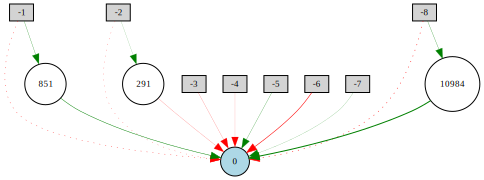

In [12]:
print("\nBest genome:\n{!s}".format(winner_list[0]))

import graphviz
from visualize import draw_net
config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_path,
    )
draw_net(config, winner_list[0])

In [13]:
winner_net = neat.nn.FeedForwardNetwork.create(winner_list[0], config)
outputs = []
for xi, xo in zip(x_inputs, x_outputs):
    output = winner_net.activate(xi)
    outputs.append(output)
    print("input {!r}, expected output {!r}, got {!r}".format(
        xi, xo, output))

input (0.03238341968911917, 0.07124352331606217, 0.10362694300518135, 0.1489637305699482, 0.23316062176165794, 0.3756476683937824, 0.1878238341968912, 0.12953367875647667), expected output (0.06476683937823834,), got [0.1306297958597483]
input (0.07124352331606217, 0.10362694300518135, 0.1489637305699482, 0.23316062176165794, 0.3756476683937824, 0.1878238341968912, 0.12953367875647667, 0.06476683937823834), expected output (0.05181347150259067,), got [0.13182472018393201]
input (0.10362694300518135, 0.1489637305699482, 0.23316062176165794, 0.3756476683937824, 0.1878238341968912, 0.12953367875647667, 0.06476683937823834, 0.05181347150259067), expected output (0.019430051813471502,), got [0.12323701699653565]
input (0.1489637305699482, 0.23316062176165794, 0.3756476683937824, 0.1878238341968912, 0.12953367875647667, 0.06476683937823834, 0.05181347150259067, 0.019430051813471502), expected output (0.0,), got [0.11415558258709581]
input (0.23316062176165794, 0.3756476683937824, 0.187823834

In [14]:
df=pd.read_csv('new_test_X.csv', sep=' ',header=None)
new_test_X = df.values
X_test_inputs = []
for i in range(len(new_test_X)):
    X_test_inputs.append(tuple(new_test_X[i]))

predictions_enn = []
for xi in X_test_inputs:
    output = winner_net.activate(xi)
    predictions_enn.append(output)

#np.savetxt(inputs + 'predictions_enn.csv', np.array(predictions_enn), delimiter=',')
real_y=pd.read_csv('new_test_Y.csv', sep=' ',header=None)
mse = np.sum((np.array(real_y) - predictions_enn)**2)/(len(predictions_enn))
mae = np.average(np.abs(np.array(real_y) - predictions_enn))
print("MSE:", mse)
print("MAE:", mae)

MSE: 0.014844833669641186
MAE: 0.09213621752999573


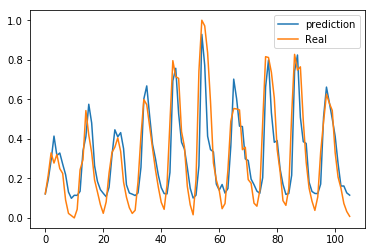

In [15]:
plt.plot(predictions_enn, label = 'prediction')
plt.plot(real_y, label = 'Real')
plt.legend()

In [40]:
net = neat.nn.FeedForwardNetwork.create(p.population[102], config)
for xi, xo in zip(x_inputs, x_outputs):
    output = net.activate(xi)
    print("pred:{} real:{}".format(output,xo))
    print("error:{}, adj error:{}".format(output[0] - xo[0],ad_fit(output[0] - xo[0])))
    #error -= ad_fit(output[0] - xo[0])

pred:[1.4782701533602096] real:(0.5287468233382603,)
error:0.9495233300219493, adj error:673557.0361753132
pred:[1.5239583555435159] real:(0.3112656780778837,)
error:1.2126926774656321, adj error:5594441937.105824
pred:[0.0] real:(0.12351577462940232,)
error:-0.12351577462940232, adj error:0.019179167715482236
pred:[0.9378426943080308] real:(0.15446949737954024,)
error:0.7833731969284905, adj error:6104.682268798438
pred:[0.0] real:(0.4671608643332532,)
error:-0.4671608643332532, adj error:5.762813801866517
pred:[0.0] real:(0.37850883451375716,)
error:-0.37850883451375716, adj error:1.2287560744043948
pred:[0.0] real:(0.016213595059167245,)
error:-0.016213595059167245, adj error:0.00026391930484327697
pred:[0.0] real:(0.5209752110142865,)
error:-0.5209752110142865, adj error:15.912769838690728
pred:[0.0] real:(0.08909815998130449,)
error:-0.08909815998130449, adj error:0.008942358054562236
pred:[1.1745414133357759] real:(0.36615604948972946,)
error:0.8083853638460464, adj error:11811.9

error:-0.6226437354040378, adj error:130.02370298250622
pred:[1.3469632641435192] real:(0.4985923414810972,)
error:0.848370922662422, adj error:35140.99498541058
pred:[0.0] real:(0.1322894990248645,)
error:-0.1322894990248645, adj error:0.022753927897820967
pred:[0.0] real:(0.13731064811380986,)
error:-0.13731064811380986, adj error:0.02501685153270118
pred:[1.3827329871748701] real:(0.2739764883608877,)
error:1.1087564988139824, adj error:125346547.2053472
pred:[0.0] real:(0.46841450378326177,)
error:-0.46841450378326177, adj error:5.896617278676763
pred:[0.0] real:(0.5877350405695168,)
error:-0.5877350405695168, adj error:61.468760159446155
pred:[0.8362148649094795] real:(0.4546124549983593,)
error:0.3816024099111202, adj error:1.2937615951875072
pred:[0.6621299649050486] real:(0.08410208142340292,)
error:0.5780278834816457, adj error:50.17300689995139
pred:[0.0] real:(0.29385771450461373,)
error:-0.29385771450461373, adj error:0.3153620798255751
pred:[0.0] real:(0.10052702294811051,

pred:[0.31102069266040944] real:(0.0518281154274736,)
error:0.2591925772329358, adj error:0.1840300861830067
pred:[0.880758716430701] real:(0.12603578437806065,)
error:0.7547229320526404, adj error:2925.7069228558817
pred:[2.304135148705832] real:(0.5019144737030878,)
error:1.8022206750027443, adj error:4.682081115673313e+21
pred:[0.0] real:(0.4517640171499576,)
error:-0.4517640171499576, adj error:4.3586843838407985
pred:[0.0] real:(0.4676949743349891,)
error:-0.4676949743349891, adj error:5.8194218346302256
pred:[1.188318560109841] real:(0.17446290486004654,)
error:1.0138556552497944, adj error:5106733.043775758
pred:[2.1958230767186517] real:(0.6745255689825751,)
error:1.5212975077360766, adj error:2760860479924632.0
pred:[0.0] real:(0.5317590526551411,)
error:-0.5317590526551411, adj error:19.656061217459026
pred:[0.0] real:(0.40646778142632495,)
error:-0.40646778142632495, adj error:1.9694210904068576
pred:[1.7802114696468623] real:(0.39268642746510507,)
error:1.3875250421817573, 

In [54]:
for i in range(1):
    print(i)
    p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-'+str(i))
    for each in p.population:
        print(each,p.population[each].fitness)
        visualize.draw_net(config, p.population[each], False, filename='square2every/{}/{}'.format(i,each), fmt="jpg")

0
56 -0.10753527109183335
101 None
102 None
103 None
104 None
105 None
106 None
107 None
108 None
109 None
110 None
111 None
112 None
113 None
114 None
115 None
116 None
117 None
118 None
119 None
120 None
121 None
122 None
123 None
124 None
125 None
126 None
127 None
128 None
129 None
130 None
131 None
132 None
133 None
134 None
135 None
26 -0.06783252455099581
136 None
137 None
138 None
139 None
140 None
141 None
142 None
143 None
144 None
145 None
146 None
147 None
148 None
149 None
150 None
151 None
152 None
153 None
154 None
155 None
156 None
157 None
158 None
159 None
160 None
161 None
162 None
163 None
164 None
165 None
166 None
167 None
168 None
169 None
170 None
171 None
172 None
173 None
174 None
175 None
176 None
177 None
178 None
179 None
180 None
181 None
182 None
183 None
184 None
185 None
186 None
187 None
188 None
189 None
190 None
191 None
192 None
193 None
194 None
195 None
196 None
197 None
198 None


In [55]:
filenames = []
previous_id = 0
number_of_ids = 0
for i in range(2):
    p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-'+str(i))
    for each in p.population:
        #print(p.population[each])
        visualize.draw_net(config, p.population[each], False, filename='square2every/{}/{}'.format(i,each), fmt="jpg")

In [30]:
p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-'+str(0))

for each in p.population:
    visualize.draw_net(config, p.population[each], False, filename='square2every/{}/{}'.format(0,each), fmt="jpg")

In [ ]:
visualize.draw_net(config, p.population[best_id], False, filename='rastrigin2_diff/'+str(number_of_ids), fmt="jpg")

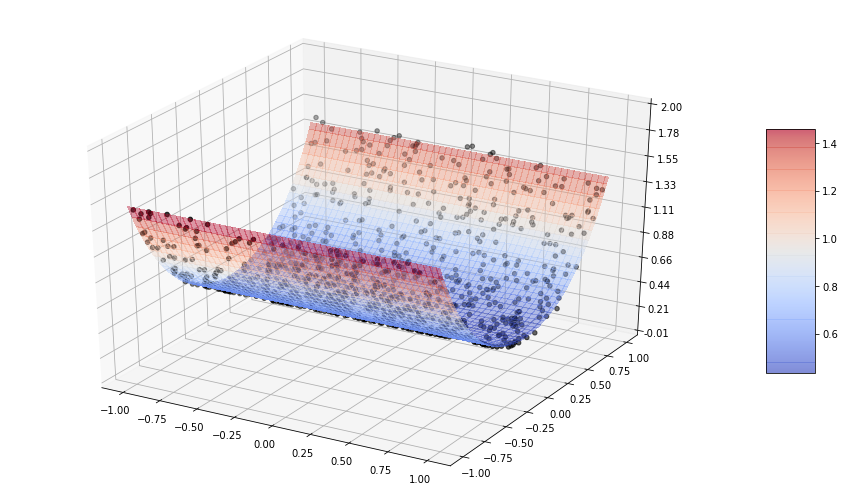

In [76]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure(figsize = (16,9))
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-1, 1, 0.02)
Y = np.arange(-1, 1, 0.02)
X, Y = np.meshgrid(X, Y)

OZ = []
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        a = np.array([X[i][j],Y[i][j]])
        OZ.append(winner_net.activate(tuple(a)))
OZ = np.array(OZ).reshape(X.shape)

Z = OZ*2
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha = 0.4)

# Customize the z axis.
ax.set_zlim(-0.01, 2)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

outputs = []
for xi in x_inputs:
    output = winner_net.activate(xi)
    outputs.append(output)

x = []
y = []
z = []
for i in range(1000):
    x.append(x_inputs[i][0])
    y.append(x_inputs[i][1])
    z.append(outputs[i][0]*2)

ax.scatter(x, y, z, c='k', marker='o')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [62]:
xi = tuple([0,0])
xo = [tuple([0])]
output = winner_net.activate(xi)
print("input {!r}, expected output {!r}, got {!r}".format(xi, xo, output[0]))

input (0, 0), expected output [(0,)], got 0.31508827719592414


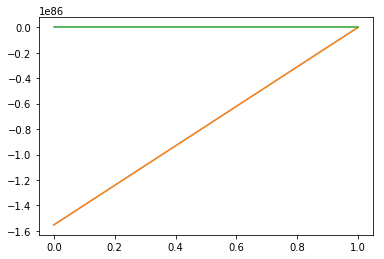

In [10]:
avg_fitness_list = []
best_list = []

for i in range(1):
    generation = range(len(stats_list[i].get_fitness_mean()))
    avg_fitness = np.array(stats_list[i].get_fitness_mean())
    avg_fitness_list.append(avg_fitness)
    best_fitness = [c.fitness for c in stats_list[i].most_fit_genomes]
    best_list.append(best_fitness)

    plt.plot(generation, avg_fitness, alpha = 0.4)
    #plt.plot(generation, best_fitness, alpha = 0.4)

plt.plot(generation, np.average(np.array(avg_fitness_list),axis = 0), label="Average")
plt.plot(generation, np.average(np.array(best_list),axis = 0), label="Best")


plt.show()

In [36]:
def find_best_id(p):
    fitness_list = [] 
    for i in p.population:
        fitness = p.population[i].fitness
        if fitness != None:
            fitness_list.append(fitness)
        else:
            fitness_list.append(float("-inf"))
    #print(len(fitness_list))
    index = fitness_list.index(max(fitness_list))
    best_id = list(p.population.keys())[index]
    return best_id

In [37]:
filenames = []
previous_id = 0
number_of_ids = 0
for i in range(100):
    p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-'+str(i*10+9))
    best_id = find_best_id(p)
    if best_id != previous_id:
        print(best_id,p.population[best_id].fitness)
        previous_id = best_id
        number_of_ids += 1
        visualize.draw_net(config, p.population[best_id], False, filename='rastrigin2_diff/'+str(number_of_ids), fmt="jpg")
    # visualize.draw_net(config, p.population[best_id], False, filename=str(i))
    filenames.append('rastrigin2/'+str(i)+'.jpg')

738 -0.033509559449906925
1501 -0.031583252189696744
2748 -0.03139439378067297
4835 -0.030960564521020698
7175 -0.030750278761816283
7264 -0.030303181190576563
13099 -0.03026106129191053
18357 -0.03019326342914568
30356 -0.03000206519245573
32195 -0.0299823371902721
37008 -0.029981003740106805
44165 -0.02932885247127812
52722 -0.025398689940641747
59085 -0.0253865315306116
69191 -0.02506501640022899
91403 -0.0248860601164877


In [17]:
config.genome_config.input_keys

list